# Air Pollution prediction and forecasting using ML

This notebooks presents our work for the project titled "Air Pollution prediction and forecasting using ML" for our course "BECE309L - Artificial Intelligence and Machine Learning".

The dataset used is [kaggle's Air Quality Dataset](https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set) which contains Hourly responses data from a gas multisensor device. The data consists of [insert 1 concise line about the data].

This notebook trains ML models to predict various **concentrations of a variety of pollutants** like metal oxides and hydrocarbons. They are 'PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'.


In [ ]:
%pip install kagglehub

## Importing libraries

In [ ]:
# General modules
import numpy as np
import pandas as pd
from tqdm import *

# For downloading data from kaggle
import kagglehub

#For plotting
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import seaborn as sns

#For dealing with time string types
import datetime

#For building ML model
from sklearn.model_selection import train_test_split

#Different Regressors for ML model
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel , RBF
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#For model evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

#For parameter grid search optimization
from sklearn.model_selection import GridSearchCV

#For saving model
import pickle

#For q-q plot
import scipy.stats as stats

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [ ]:
fedesoriano_air_quality_data_set_path = kagglehub.dataset_download('fedesoriano/air-quality-data-set')
fedesoriano_air_quality_data_set_path=fedesoriano_air_quality_data_set_path+"/AirQuality.csv"

print('Data source import complete.')

100%|██████████| 248k/248k [00:00<00:00, 35.3MB/s]

Extracting files...
Data source import complete.


In [ ]:
df = pd.read_csv(fedesoriano_air_quality_data_set_path, sep = ";", decimal = ",")
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [ ]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  Unnamed: 15  Unnamed: 16  
count  9357.000000  9357.000000  9357.000000          0.0          0.0  
mean      9.778305    39.485380    -6.837604          NaN          NaN  
std      43.203623    51.216145    38.976670          NaN          NaN  
min    -200.000000  -200.000000  -200.000000          NaN          NaN  
25%      10.900000    34.100000     0.692300          NaN          NaN  
50%      17.200000    48.600000     0.976800          NaN          NaN  
75%      24.100000    61.900000     1.296200          NaN          NaN  
max      44.600000    88.700000     2.231000          NaN          NaN

Missing values are tagged with -200 value. This is given in the dataset documentation. so we change them into NAN values

## Data Cleaning

In [ ]:
df.replace(to_replace = -200, value = np.nan, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [ ]:
df.shape

(9471, 17)

In [ ]:
percent_NaN = []
columns = df.columns
for col in columns:
    pNaN =  (df[col].isna().sum()/df.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column',ascending = False)
nan_percent_df

%_NaN_in_Column
Unnamed: 16         100.000000
Unnamed: 15         100.000000
NMHC(GT)             90.349488
CO(GT)               18.973709
NO2(GT)              18.540809
NOx(GT)              18.509133
PT08.S5(O3)           5.068103
AH                    5.068103
RH                    5.068103
T                     5.068103
PT08.S3(NOx)          5.068103
PT08.S4(NO2)          5.068103
PT08.S2(NMHC)         5.068103
C6H6(GT)              5.068103
PT08.S1(CO)           5.068103
Time                  1.203674
Date                  1.203674

In [ ]:
df.drop(['NMHC(GT)', 'Unnamed: 16', 'Unnamed: 15'], axis=1, inplace=True, errors = 'ignore')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6941 non-null   object 
 1   Time           6941 non-null   object 
 2   CO(GT)         6941 non-null   float64
 3   PT08.S1(CO)    6941 non-null   float64
 4   C6H6(GT)       6941 non-null   float64
 5   PT08.S2(NMHC)  6941 non-null   float64
 6   NOx(GT)        6941 non-null   float64
 7   PT08.S3(NOx)   6941 non-null   float64
 8   NO2(GT)        6941 non-null   float64
 9   PT08.S4(NO2)   6941 non-null   float64
 10  PT08.S5(O3)    6941 non-null   float64
 11  T              6941 non-null   float64
 12  RH             6941 non-null   float64
 13  AH             6941 non-null   float64
dtypes: float64(12), object(2)
memory usage: 813.4+ KB


In [ ]:
df['DateTime'] =  (df.Date) + ' ' + (df.Time)
df.DateTime = pd.to_datetime(df.DateTime, format='%d/%m/%Y %H.%M.%S')
df['DateTime'].head()

0   2004-03-10 18:00:00
1   2004-03-10 19:00:00
2   2004-03-10 20:00:00
3   2004-03-10 21:00:00
4   2004-03-10 22:00:00
Name: DateTime, dtype: datetime64[ns]

In [ ]:
df['Weekday'] = df['DateTime'].dt.day_name()
df['Month']   = df['DateTime'].dt.month_name()
df['Hour']    = df['DateTime'].dt.hour
df['Date']    = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.drop('Time', axis=1, inplace=True, errors = 'ignore')
df.head(1)

Date  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10     2.6       1360.0      11.9         1046.0    166.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   

             DateTime    Weekday  Month  Hour  
0 2004-03-10 18:00:00  Wednesday  March    18

In [ ]:
df = df[['Date','Month', 'Weekday','DateTime', 'Hour', 'CO(GT)','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
         'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   datetime64[ns]
 1   Month          6941 non-null   object        
 2   Weekday        6941 non-null   object        
 3   DateTime       6941 non-null   datetime64[ns]
 4   Hour           6941 non-null   int32         
 5   CO(GT)         6941 non-null   float64       
 6   PT08.S1(CO)    6941 non-null   float64       
 7   C6H6(GT)       6941 non-null   float64       
 8   PT08.S2(NMHC)  6941 non-null   float64       
 9   NOx(GT)        6941 non-null   float64       
 10  PT08.S3(NOx)   6941 non-null   float64       
 11  NO2(GT)        6941 non-null   float64       
 12  PT08.S4(NO2)   6941 non-null   float64       
 13  PT08.S5(O3)    6941 non-null   float64       
 14  T              6941 non-null   float64       
 15  RH             6941 non-nu

In [ ]:
cols = list(df.columns)[5:]

In [ ]:
#Removing Outliers with the Interquartile Range Method (IQR)
Q1 = df[cols].quantile(0.25) #first 25% of the data
Q3 = df[cols].quantile(0.75) #first 75% of the data
IQR = Q3 - Q1 #IQR = InterQuartile Range

scale = 1.4 #May need to play with this value to modify outlier detection sensitivity if need be
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

# cols = df.columns[5:] # Look for oulierts in columns starting from CO(GT)

#Mask a masking condition that removes rows that have values above/below IQR limits
condition = ~((df[cols] < lower_lim) | (df[cols] > upper_lim)).any(axis=1)

#Generate new dataframe that has had its outliers removed
df_filtered = df[condition]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6099 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6099 non-null   datetime64[ns]
 1   Month          6099 non-null   object        
 2   Weekday        6099 non-null   object        
 3   DateTime       6099 non-null   datetime64[ns]
 4   Hour           6099 non-null   int32         
 5   CO(GT)         6099 non-null   float64       
 6   PT08.S1(CO)    6099 non-null   float64       
 7   C6H6(GT)       6099 non-null   float64       
 8   PT08.S2(NMHC)  6099 non-null   float64       
 9   NOx(GT)        6099 non-null   float64       
 10  PT08.S3(NOx)   6099 non-null   float64       
 11  NO2(GT)        6099 non-null   float64       
 12  PT08.S4(NO2)   6099 non-null   float64       
 13  PT08.S5(O3)    6099 non-null   float64       
 14  T              6099 non-null   float64       
 15  RH             6099 non-nu

842 rows removed

### EDA using ydata_profiling

it gives quick EDA results without much effort

In [ ]:
!pip install ydata-profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.2 MB/s eta 0:00:00


In [ ]:
from ydata_profiling  import ProfileReport

In [ ]:
report = ProfileReport(df_filtered)
report

In [ ]:
# removing variables that have similar varibales - using correlation matrix
df_filtered.drop(['CO(GT)']  ,axis=1, inplace=True, errors = 'ignore') # PT08.S1(CO) is the same thing
df_filtered.drop(['NOx(GT)'] ,axis=1, inplace=True, errors = 'ignore') # PT08.S3(NOx) is there
df_filtered.drop(['C6H6(GT)'],axis=1, inplace=True, errors = 'ignore') # PT08.S2(NMHC) is also deteching hydrocarbons
df_filtered.drop(['NO2(GT)'] ,axis=1, inplace=True, errors = 'ignore') # PT08.S4(NO2) is specific gas sensor
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6099 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6099 non-null   datetime64[ns]
 1   Month          6099 non-null   object        
 2   Weekday        6099 non-null   object        
 3   DateTime       6099 non-null   datetime64[ns]
 4   Hour           6099 non-null   int32         
 5   PT08.S1(CO)    6099 non-null   float64       
 6   PT08.S2(NMHC)  6099 non-null   float64       
 7   PT08.S3(NOx)   6099 non-null   float64       
 8   PT08.S4(NO2)   6099 non-null   float64       
 9   PT08.S5(O3)    6099 non-null   float64       
 10  T              6099 non-null   float64       
 11  RH             6099 non-null   float64       
 12  AH             6099 non-null   float64       
dtypes: datetime64[ns](2), float64(8), int32(1), object(2)
memory usage: 772.3+ KB


### pair plot

In [ ]:
# pair plot
df_final = df_filtered.iloc[:, 5:]
df_final
sns.set(font_scale=1.5)
sns.pairplot(df_final)

## Time Series on Air Quality Data

In [ ]:
month_df_list = []
day_df_list   = []
hour_df_list  = []

months = ['January','February','March', 'April', 'May','June',
          'July', 'August', 'September', 'October', 'November', 'December']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for month in months:
    temp_df = df_filtered.loc[(df_filtered['Month'] == month)]
    month_df_list.append(temp_df)

for day in days:
    temp_df = df_filtered.loc[(df_filtered['Weekday'] == day)]
    day_df_list.append(temp_df)

for hour in range(24):
    temp_df = df_filtered.loc[(df_filtered['Hour'] == hour)]
    hour_df_list.append(temp_df)




def df_time_plotter(df_list, time_unit, y_col):

    months = ['January','February','March', 'April', 'May','June',
              'July', 'August', 'September', 'October', 'November', 'December']

    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    if time_unit == 'M':
        nRows = 3
        nCols = 4
        n_iter = len(months)
    elif time_unit == 'D':
        nRows = 2
        nCols = 4
        n_iter = len(days)
    elif time_unit == 'H':
        nRows = 4
        nCols = 6
        n_iter = 24
    else:
        print('time_unit must be a string equal to M,D, or H')
        return 0

    fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize = (40,30))
    axs = axs.ravel()
    for i in range(n_iter):
        data = df_list[i]
        ax = axs[i]
        data.plot(kind ='scatter', x = 'DateTime', y= y_col , ax = ax, fontsize = 24)
        ax.set_ylabel('Pollutant Concentration',fontsize=30)
        ax.set_xlabel('')
        if time_unit == 'M':
            ax.set_title(y_col + ' ' + months[i],  size=40) # Title
        elif time_unit == 'D':
            ax.set_title(y_col + ' ' + days[i],  size=40) # Title
        else:
             ax.set_title(y_col + ' ' + str(i),  size=40) # Title
        ax.tick_params(labelrotation=60)

        #plt.xlim([datetime.date(2004, 3, 10), datetime.date(2004, 3, 30)])
    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)
    plt.show() # Depending on whether you use IPython or interactive mode, etc.

### CO

In [ ]:
# visualize different pollutant concentrations at different months, days, and hours
df_time_plotter(month_df_list,'M','PT08.S1(CO)')
df_time_plotter(day_df_list,'D','PT08.S1(CO)')
df_time_plotter(hour_df_list,'H','PT08.S1(CO)')

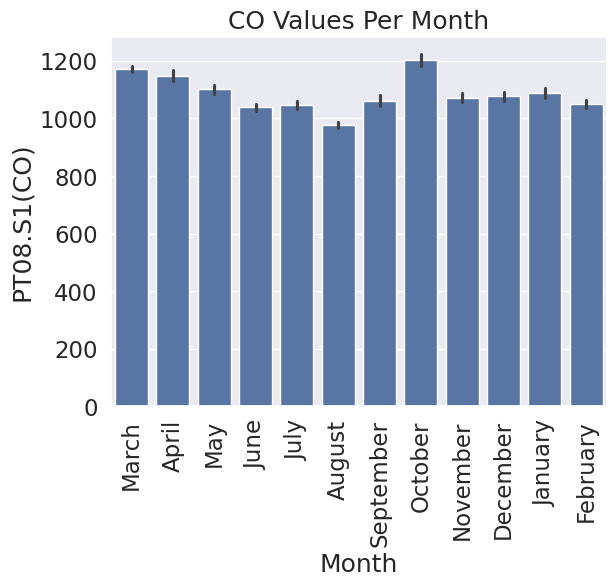

In [ ]:
sns.barplot(x = 'Month', y = 'PT08.S1(CO)', data = df_filtered)
plt.title('CO Values Per Month')
plt.xticks(rotation=90)
plt.show()

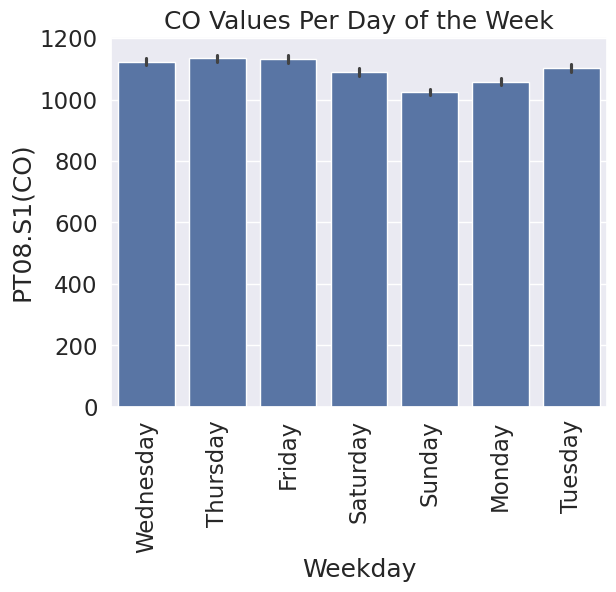

In [ ]:
sns.barplot(x = 'Weekday', y = 'PT08.S1(CO)', data = df_filtered)
plt.title('CO Values Per Day of the Week')
plt.xticks(rotation=90)
plt.show()

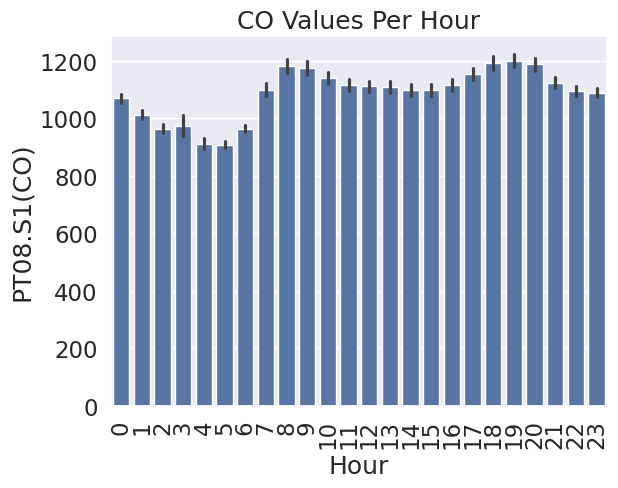

In [ ]:
sns.barplot(x = 'Hour', y = 'PT08.S1(CO)', data = df_filtered)
plt.title('CO Values Per Hour')
plt.xticks(rotation=90)
plt.show()

### NMHC

In [ ]:
# visualize different pollutant concentrations at different months, days, and hours
df_time_plotter(month_df_list,'M','PT08.S2(NMHC)')
df_time_plotter(day_df_list,'D','PT08.S2(NMHC)')
df_time_plotter(hour_df_list,'H','PT08.S2(NMHC)')

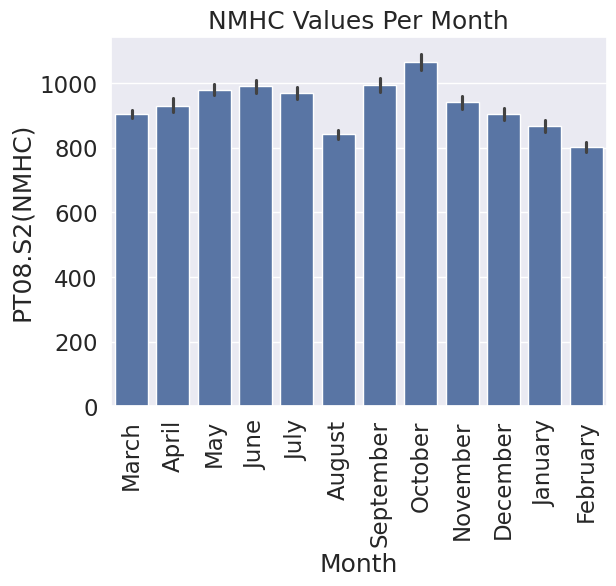

In [ ]:
sns.barplot(x = 'Month', y = 'PT08.S2(NMHC)', data = df_filtered)
plt.title('NMHC Values Per Month')
plt.xticks(rotation=90)
plt.show()

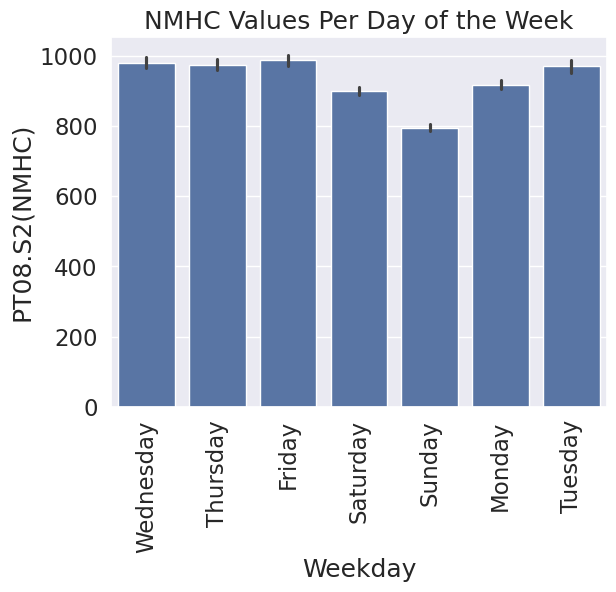

In [ ]:
sns.barplot(x = 'Weekday', y = 'PT08.S2(NMHC)', data = df_filtered)
plt.title('NMHC Values Per Day of the Week')
plt.xticks(rotation=90)
plt.show()

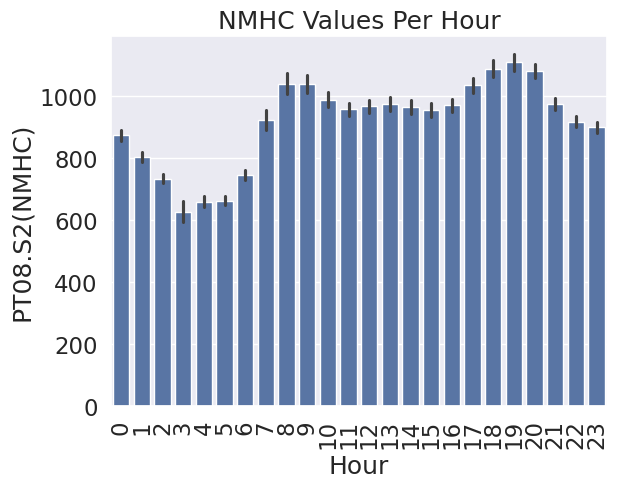

In [ ]:
sns.barplot(x = 'Hour', y = 'PT08.S2(NMHC)', data = df_filtered)
plt.title('NMHC Values Per Hour')
plt.xticks(rotation=90)
plt.show()

### NOx

In [ ]:
# visualize different pollutant concentrations at different months, days, and hours
df_time_plotter(month_df_list,'M','PT08.S3(NOx)')
df_time_plotter(day_df_list,'D','PT08.S3(NOx)')
df_time_plotter(hour_df_list,'H','PT08.S3(NOx)')

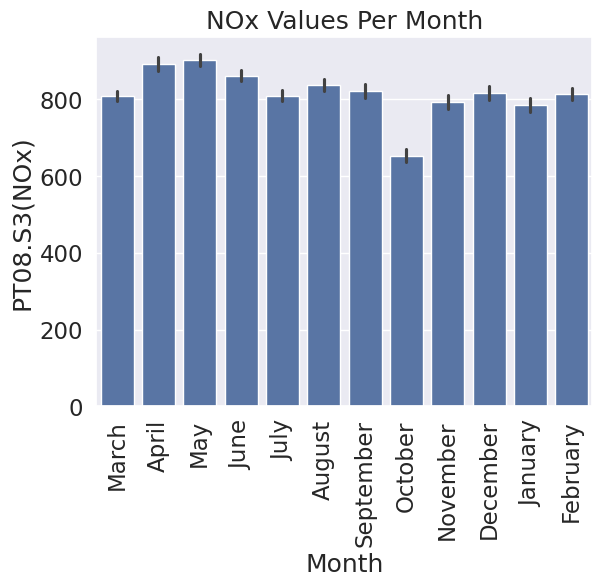

In [ ]:
sns.barplot(x = 'Month', y = 'PT08.S3(NOx)', data = df_filtered)
plt.title('NOx Values Per Month')
plt.xticks(rotation=90)
plt.show()

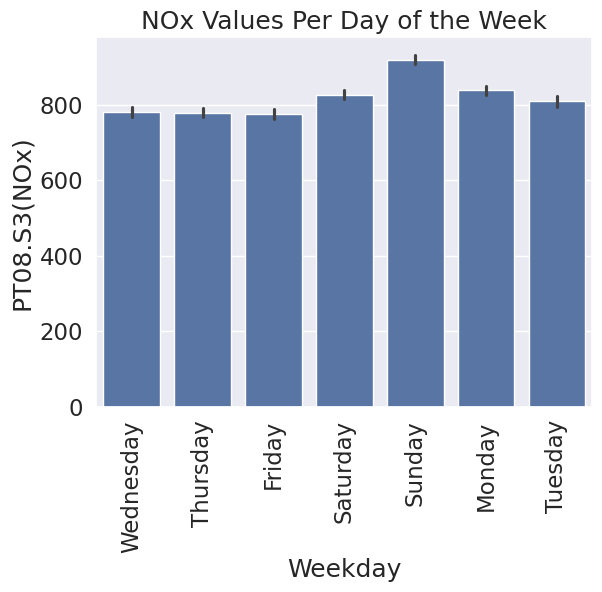

In [ ]:
sns.barplot(x = 'Weekday', y = 'PT08.S3(NOx)', data = df_filtered)
plt.title('NOx Values Per Day of the Week')
plt.xticks(rotation=90)
plt.show()

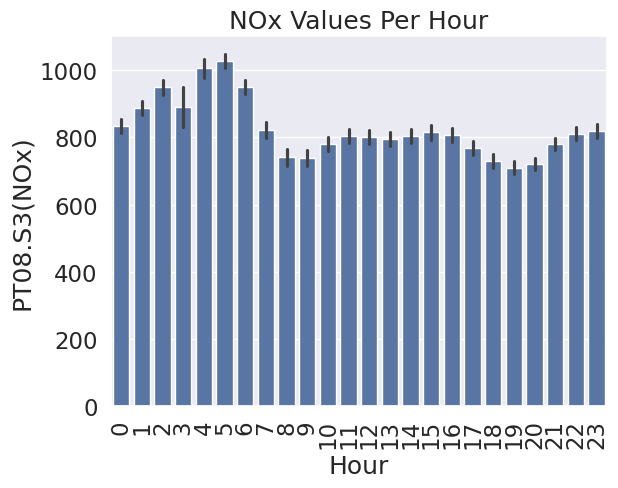

In [ ]:
sns.barplot(x = 'Hour', y = 'PT08.S3(NOx)', data = df_filtered)
plt.title('NOx Values Per Hour')
plt.xticks(rotation=90)
plt.show()

### NO2

In [ ]:
# visualize different pollutant concentrations at different months, days, and hours
df_time_plotter(month_df_list,'M','PT08.S4(NO2)')
df_time_plotter(day_df_list,'D','PT08.S4(NO2)')
df_time_plotter(hour_df_list,'H','PT08.S4(NO2)')

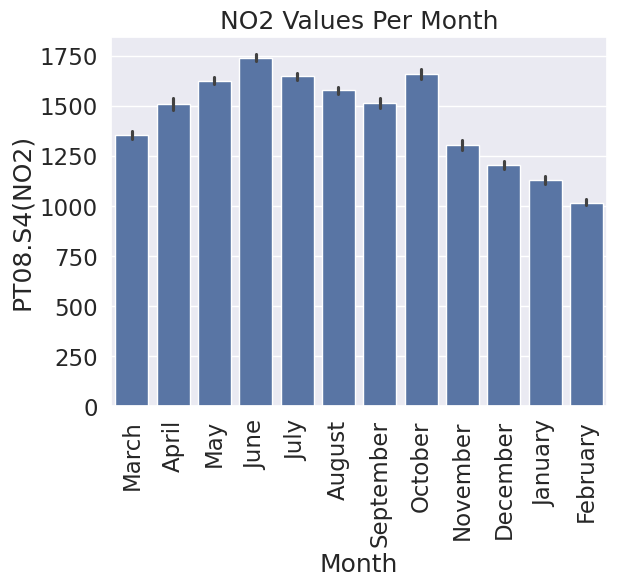

In [ ]:
sns.barplot(x = 'Month', y = 'PT08.S4(NO2)', data = df_filtered)
plt.title('NO2 Values Per Month')
plt.xticks(rotation=90)
plt.show()

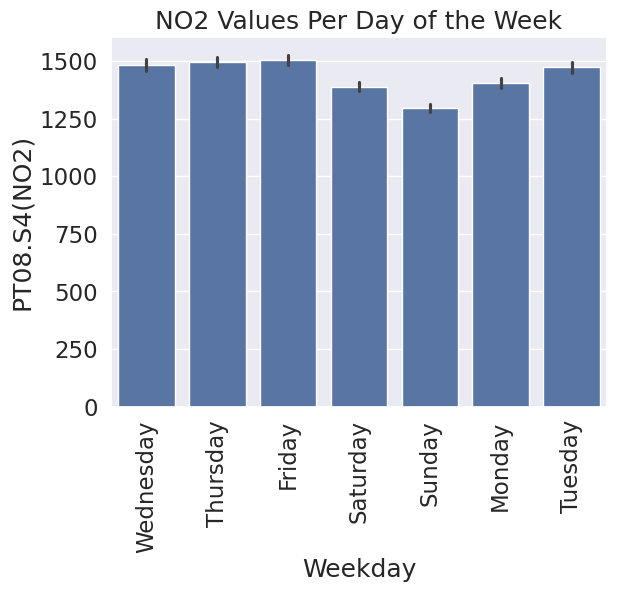

In [ ]:
sns.barplot(x = 'Weekday', y = 'PT08.S4(NO2)', data = df_filtered)
plt.title('NO2 Values Per Day of the Week')
plt.xticks(rotation=90)
plt.show()

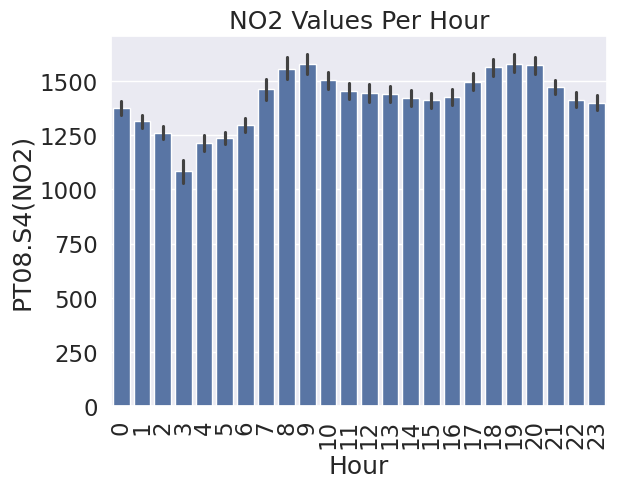

In [ ]:
sns.barplot(x = 'Hour', y = 'PT08.S4(NO2)', data = df_filtered)
plt.title('NO2 Values Per Hour')
plt.xticks(rotation=90)
plt.show()

### O3

In [ ]:
# visualize different pollutant concentrations at different months, days, and hours
df_time_plotter(month_df_list,'M','PT08.S5(O3)')
df_time_plotter(day_df_list,'D','PT08.S5(O3)')
df_time_plotter(hour_df_list,'H','PT08.S5(O3)')

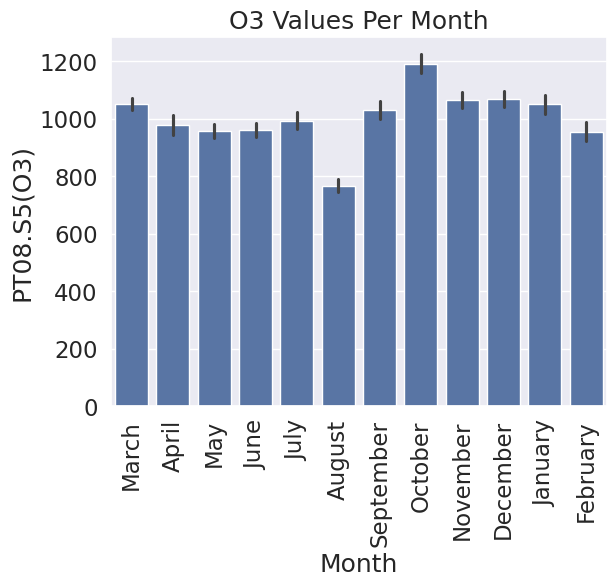

In [ ]:
sns.barplot(x = 'Month', y = 'PT08.S5(O3)', data = df_filtered)
plt.title('O3 Values Per Month')
plt.xticks(rotation=90)
plt.show()

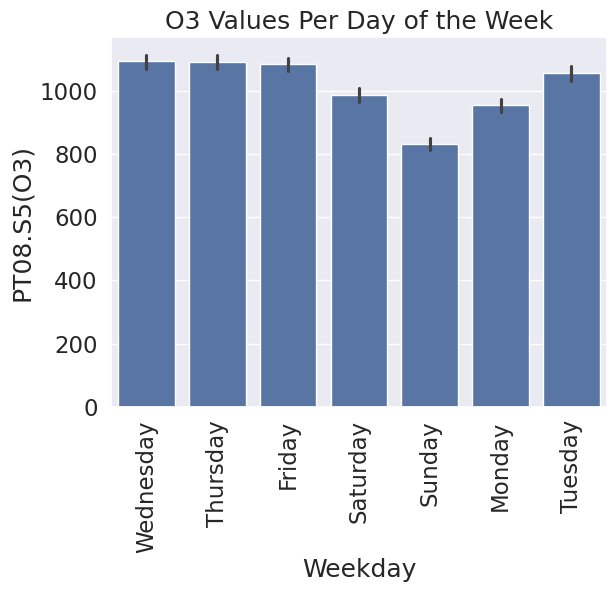

In [ ]:
sns.barplot(x = 'Weekday', y = 'PT08.S5(O3)', data = df_filtered)
plt.title('O3 Values Per Day of the Week')
plt.xticks(rotation=90)
plt.show()

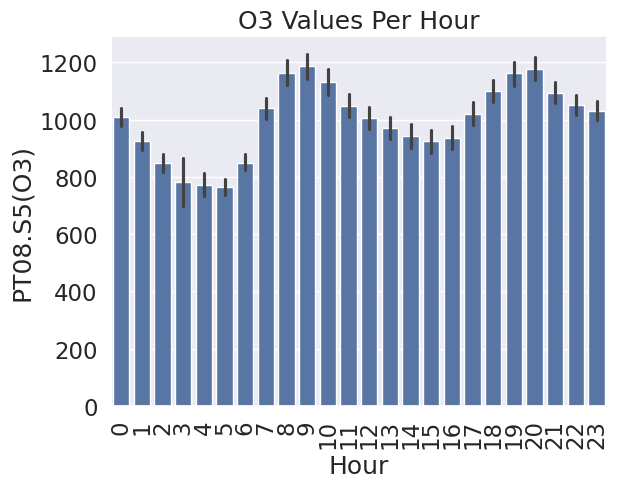

In [ ]:
sns.barplot(x = 'Hour', y = 'PT08.S5(O3)', data = df_filtered)
plt.title('O3 Values Per Hour')
plt.xticks(rotation=90)
plt.show()

## Machine learning

different ml algos have been used to test which performs the best

- LinearRegression()
- HuberRegressor
- RandomForestRegressor
- GradientBoostingRegressor
- GaussianProcessRegressor
- KNeighborsRegressor
- AdaBoostRegressor
- SVR
- DecisionTreeRegressor
- MLPRegressor

## Machine learning

different ml algos have been used to test which performs the best

- LinearRegression()
- HuberRegressor
- RandomForestRegressor
- GradientBoostingRegressor
- GaussianProcessRegressor
- KNeighborsRegressor
- AdaBoostRegressor
- SVR
- DecisionTreeRegressor
- MLPRegressor

In [ ]:
def model_assess(X_train, X_test, y_train, y_test, model, title = "Default"):

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results = pd.DataFrame([title,train_mse, train_r2, test_mse, test_r2]).transpose()
    results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
    return y_train_pred,y_test_pred, results

def multi_model_assess(df, models, y_predict):
    all_model_results = [] #This will contain all model results for each dependent variable
    all_X_test  = []
    all_X_train = []
    all_y_test_p  = []
    all_y_train_p = []
    all_y_train = []
    #First loop will define dependent/independent variables and split data into test/training sets
    n_vars = len(y_predict)
    pbar = tqdm(range(n_vars), desc="Variable Processed", position = 0, leave = True)#Add progress bar

    for dependent in y_predict:
        model_results = [] #Array with dataframes for a given dependent variable
        #Designate independent and dependent variables
        x  = df.drop([dependent], axis = 1)
        y  = df[dependent]
        #Split data into test and training sets
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

        #Populate the array of observed values for the dependent variable
        all_y_train.append(y_train)

        #Process each of the desired models
        for model, model_name in models:
            y_train_pred,y_test_pred, results = model_assess(X_train, X_test, y_train, y_test,
                                                             model, title = model_name)

            model_results.append(results)
            all_X_test.append(X_test)
            all_X_train.append(X_train)
            all_y_test_p.append(y_test_pred)
            all_y_train_p.append(y_train_pred)

        all_model_results.append(model_results)
        pbar.update(1)
        pbar.refresh()

    pbar.close()
    return all_model_results, all_X_test, all_X_train, all_y_test_p, all_y_train_p, all_y_train

In [ ]:
#Initiate Different Regressors for ML model
lr = LinearRegression()
hr = HuberRegressor(epsilon=1.15, max_iter=1000)
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
gp = GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel(), random_state=42)
kn = KNeighborsRegressor()
ab = AdaBoostRegressor()
sv = SVR()
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
nn = MLPRegressor(hidden_layer_sizes = 500, solver='adam', learning_rate_init = 1e-2,max_iter=500)

models =  [(lr,'Linear Regression'),
           (hr,'Huber Regression'),
           (rf,'Random Forest'),
           (gb,'Gradient Boosting'),
           (gp,'Gaussian Process'),
           (kn,'K-Neighbors'),
           (ab,'Ada Boost'),
           (sv,'SVR'),
           (dt,'Decision Tree'),
           (nn,'MLP')]

y_predict  = ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']

#Check if df_final is empty or has required columns
if df_final.empty or not all(col in df_final.columns for col in y_predict):
    print("Error: df_final is empty or missing required columns.")
    # Further investigation needed to understand why df_final is empty or missing columns
    # For example, check the number of columns in aq_filtered and the values in y_predict
else:
    all_model_results, _, _, all_y_test_p, all_y_train_p, all_y_train = multi_model_assess(df_final,models, y_predict)

Variable Processed: 100%|██████████| 5/5 [29:02<00:00, 348.45s/it]


In [ ]:
#Define column with model to predict
y_predict  = ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']

#Model names for plot titles
models =  [(lr,'Linear Regression'),
           (hr,'Huber Regression'),
           (rf,'Random Forest'),
           (gb,'Gradient Boosting'),
           (gp,'Gaussian Process'),
           (kn,'K Neighbors'),
           (ab,'Ada Boost'),
           (sv,'SVR'),
           (dt,'Decision Tree'),
           (nn,'MLP')]

#Make labels
def make_labels(models):
    names = []
    for i in range(len(models)):
        if len(models[i][1].split()) < 2:
            names.append(models[i][1])
        else:
            names.append(''.join([s[0] for s in models[i][1].split()]))
    return names
labelList = make_labels(models)

#Specify color map to color different plots
cmap = plt.cm.get_cmap('plasma')
slicedCM = cmap(np.linspace(0, 1, len(models)))

#Visualize results of linear regression
plt.rcParams.update({'font.size': 20})
nRows = 5 #
nCols = 2 #

def plot_ML_model(whichVar):
    fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize = (15,30))
    axs = axs.ravel()
    df    = pd.concat(all_model_results[whichVar], ignore_index=True)
    for k in range(10):
        color = slicedCM[k]
        yPred = all_y_train_p[k + whichVar*len(models)]
        yMeas = all_y_train[whichVar]
        label = labelList[k]
        ax    = axs[k]
        #Make scatter plot of train set and regressor model
        ax.scatter(x = yMeas, y = yPred, color=color, alpha=0.5)

        #Fit a first order polynomial (i.e. a straight line) to the regressor model
        z = np.polyfit(yMeas, yPred, 1)
        p = np.poly1d(z)

        #Add labels and colors and stuff
        val = df['Test R2'][k] #Get the r2 value from the model results dataframe
        val = "{:.2f}".format(val)
        ax.plot(yMeas,p(yMeas),"#b20cd7", label=label+"\nr\u00b2".format(2) + " = " + str(val))
        ax.title.set_text(models[k][1])
        ax.set(xlabel='Train Concentration', ylabel='Predicted Concentration')
        ax.label_outer()
        ax.legend(loc="upper left")
        ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    plt.show()

### Models for CO Concentration Prediction

In [ ]:
score_df_results = pd.concat(all_model_results[0],
                        ignore_index=True).sort_values('Test R2',axis = 0, ascending = False)
score_df_results
score_results_test = pd.concat(all_model_results[0], ignore_index=True)
score_results_test['Test R2'][0]

0.8356960503616119

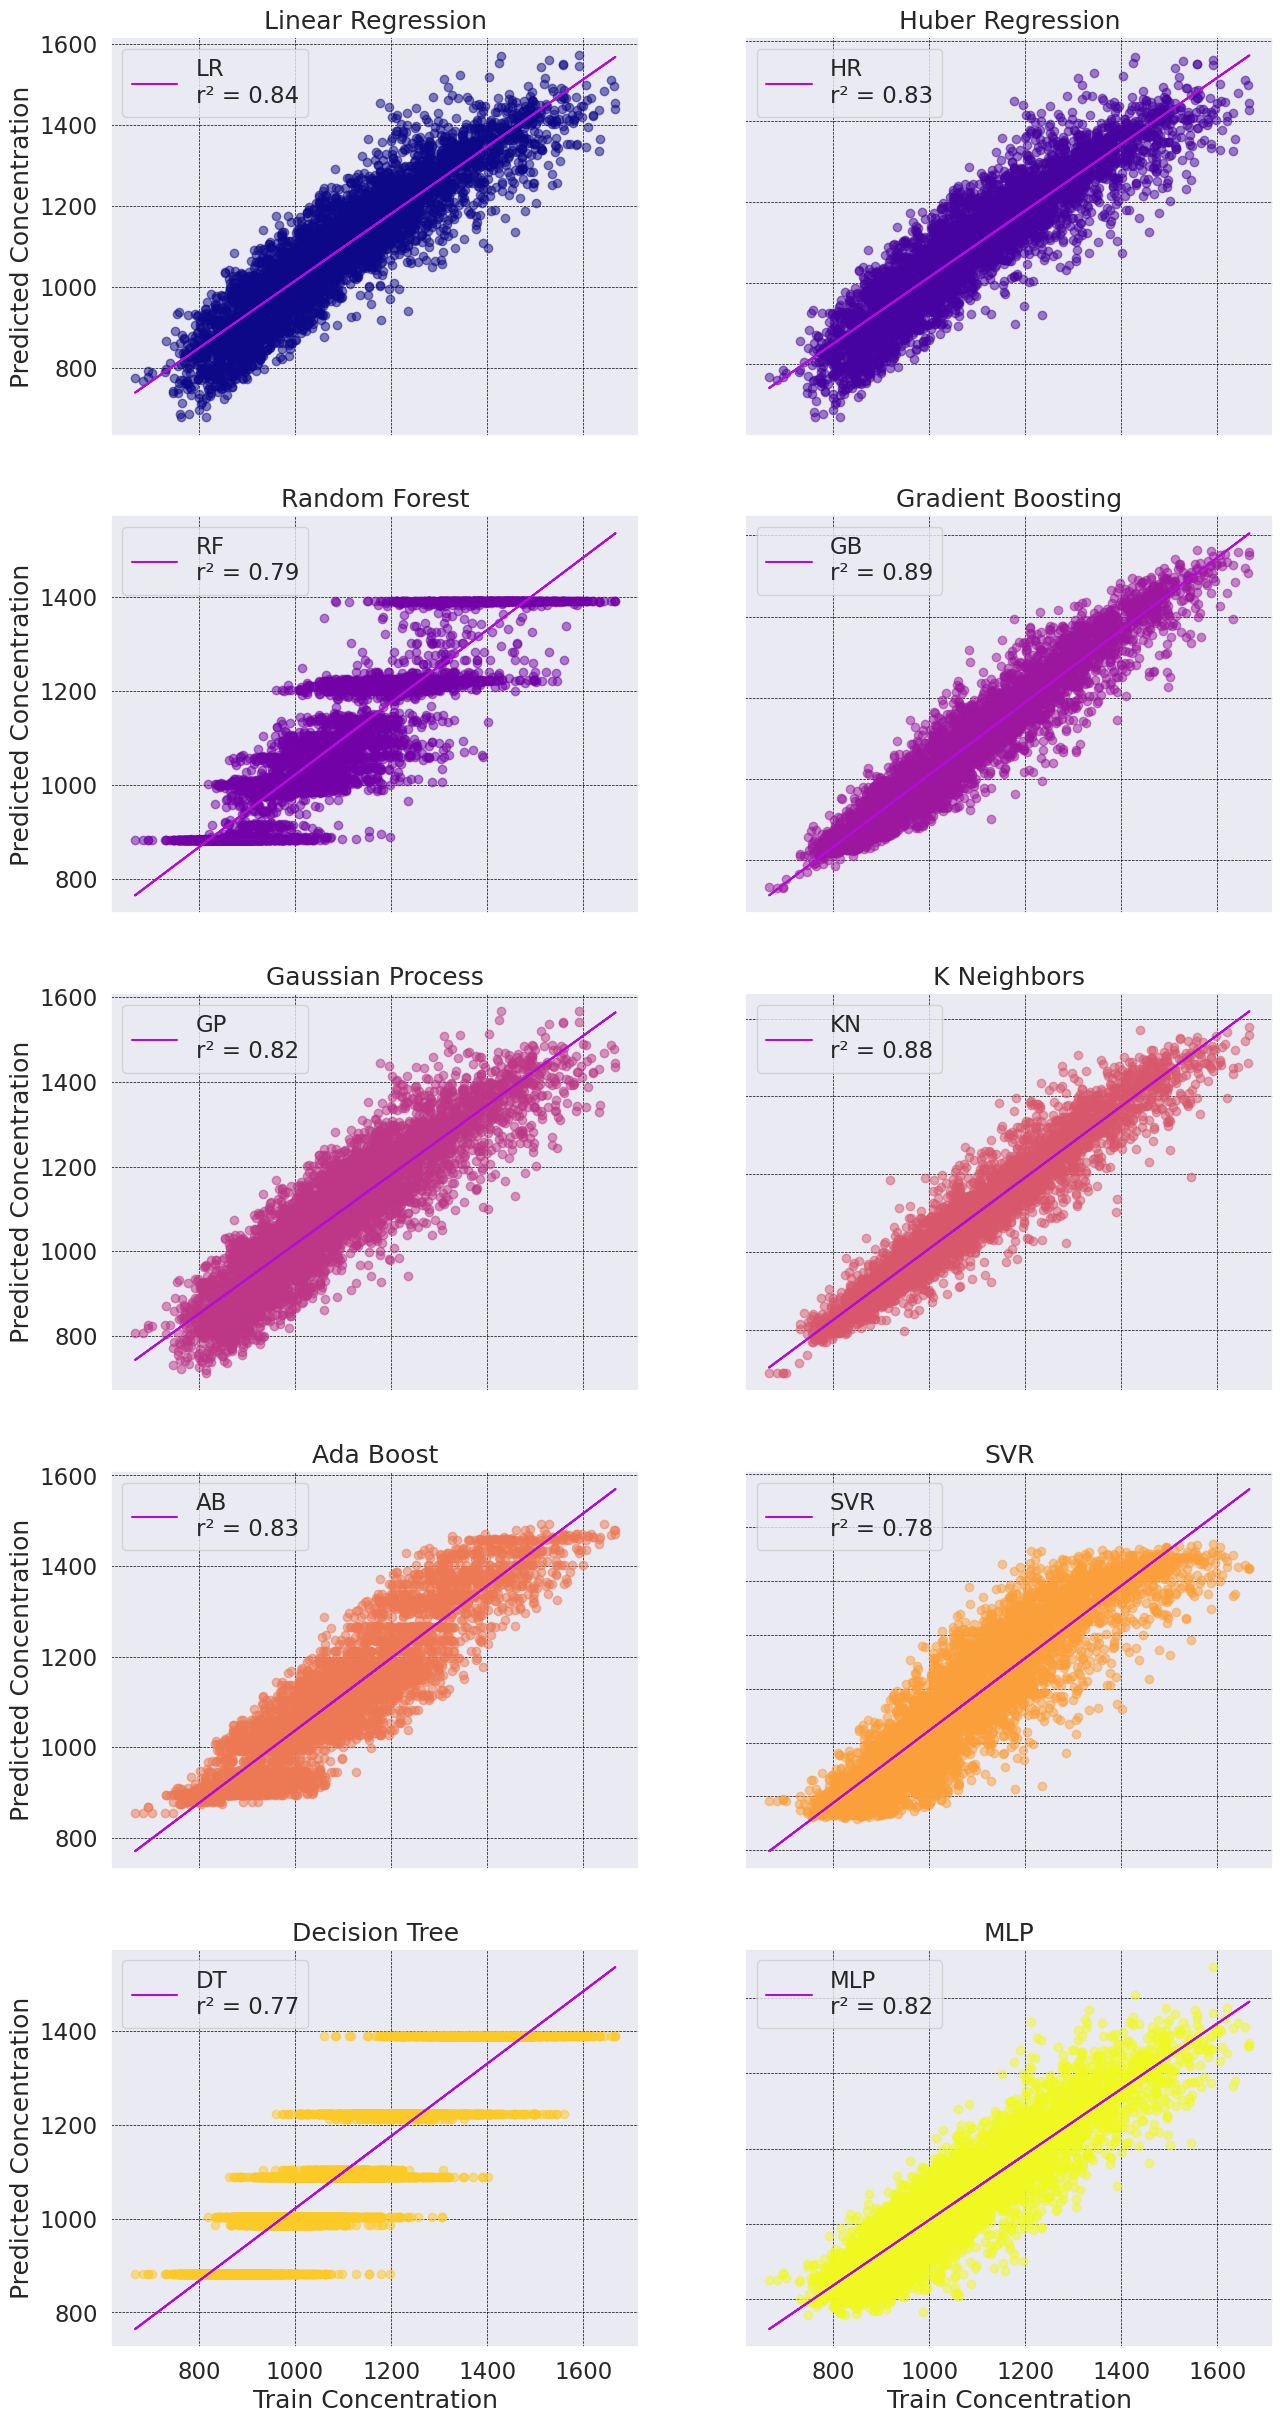

In [ ]:
plot_ML_model(0)

### Models for NMHC Concentration Prediction

In [ ]:
score_df_results = pd.concat(all_model_results[1],
                        ignore_index=True).sort_values('Test R2',axis = 0, ascending = False)
score_df_results

Method  Training MSE Training R2      Test MSE   Test R2
3  Gradient Boosting   2041.462602    0.957702   2460.714195   0.95099
1   Huber Regression   3404.252996    0.929466   2970.851421   0.94083
0  Linear Regression   3356.975434    0.930446   2972.932194  0.940788
4   Gaussian Process   3751.830295    0.922265   3315.488621  0.933966
5        K-Neighbors   2773.548768    0.942534   4338.780525  0.913585
6          Ada Boost   4569.146012    0.905331    4887.40413  0.902658
9                MLP   5378.023328    0.888571   5192.842183  0.896575
7                SVR   7702.354428    0.840413   7851.237772  0.843627
2      Random Forest   8032.345639    0.833576   8432.510616   0.83205
8      Decision Tree  10823.266106     0.77575  11363.620162  0.773672

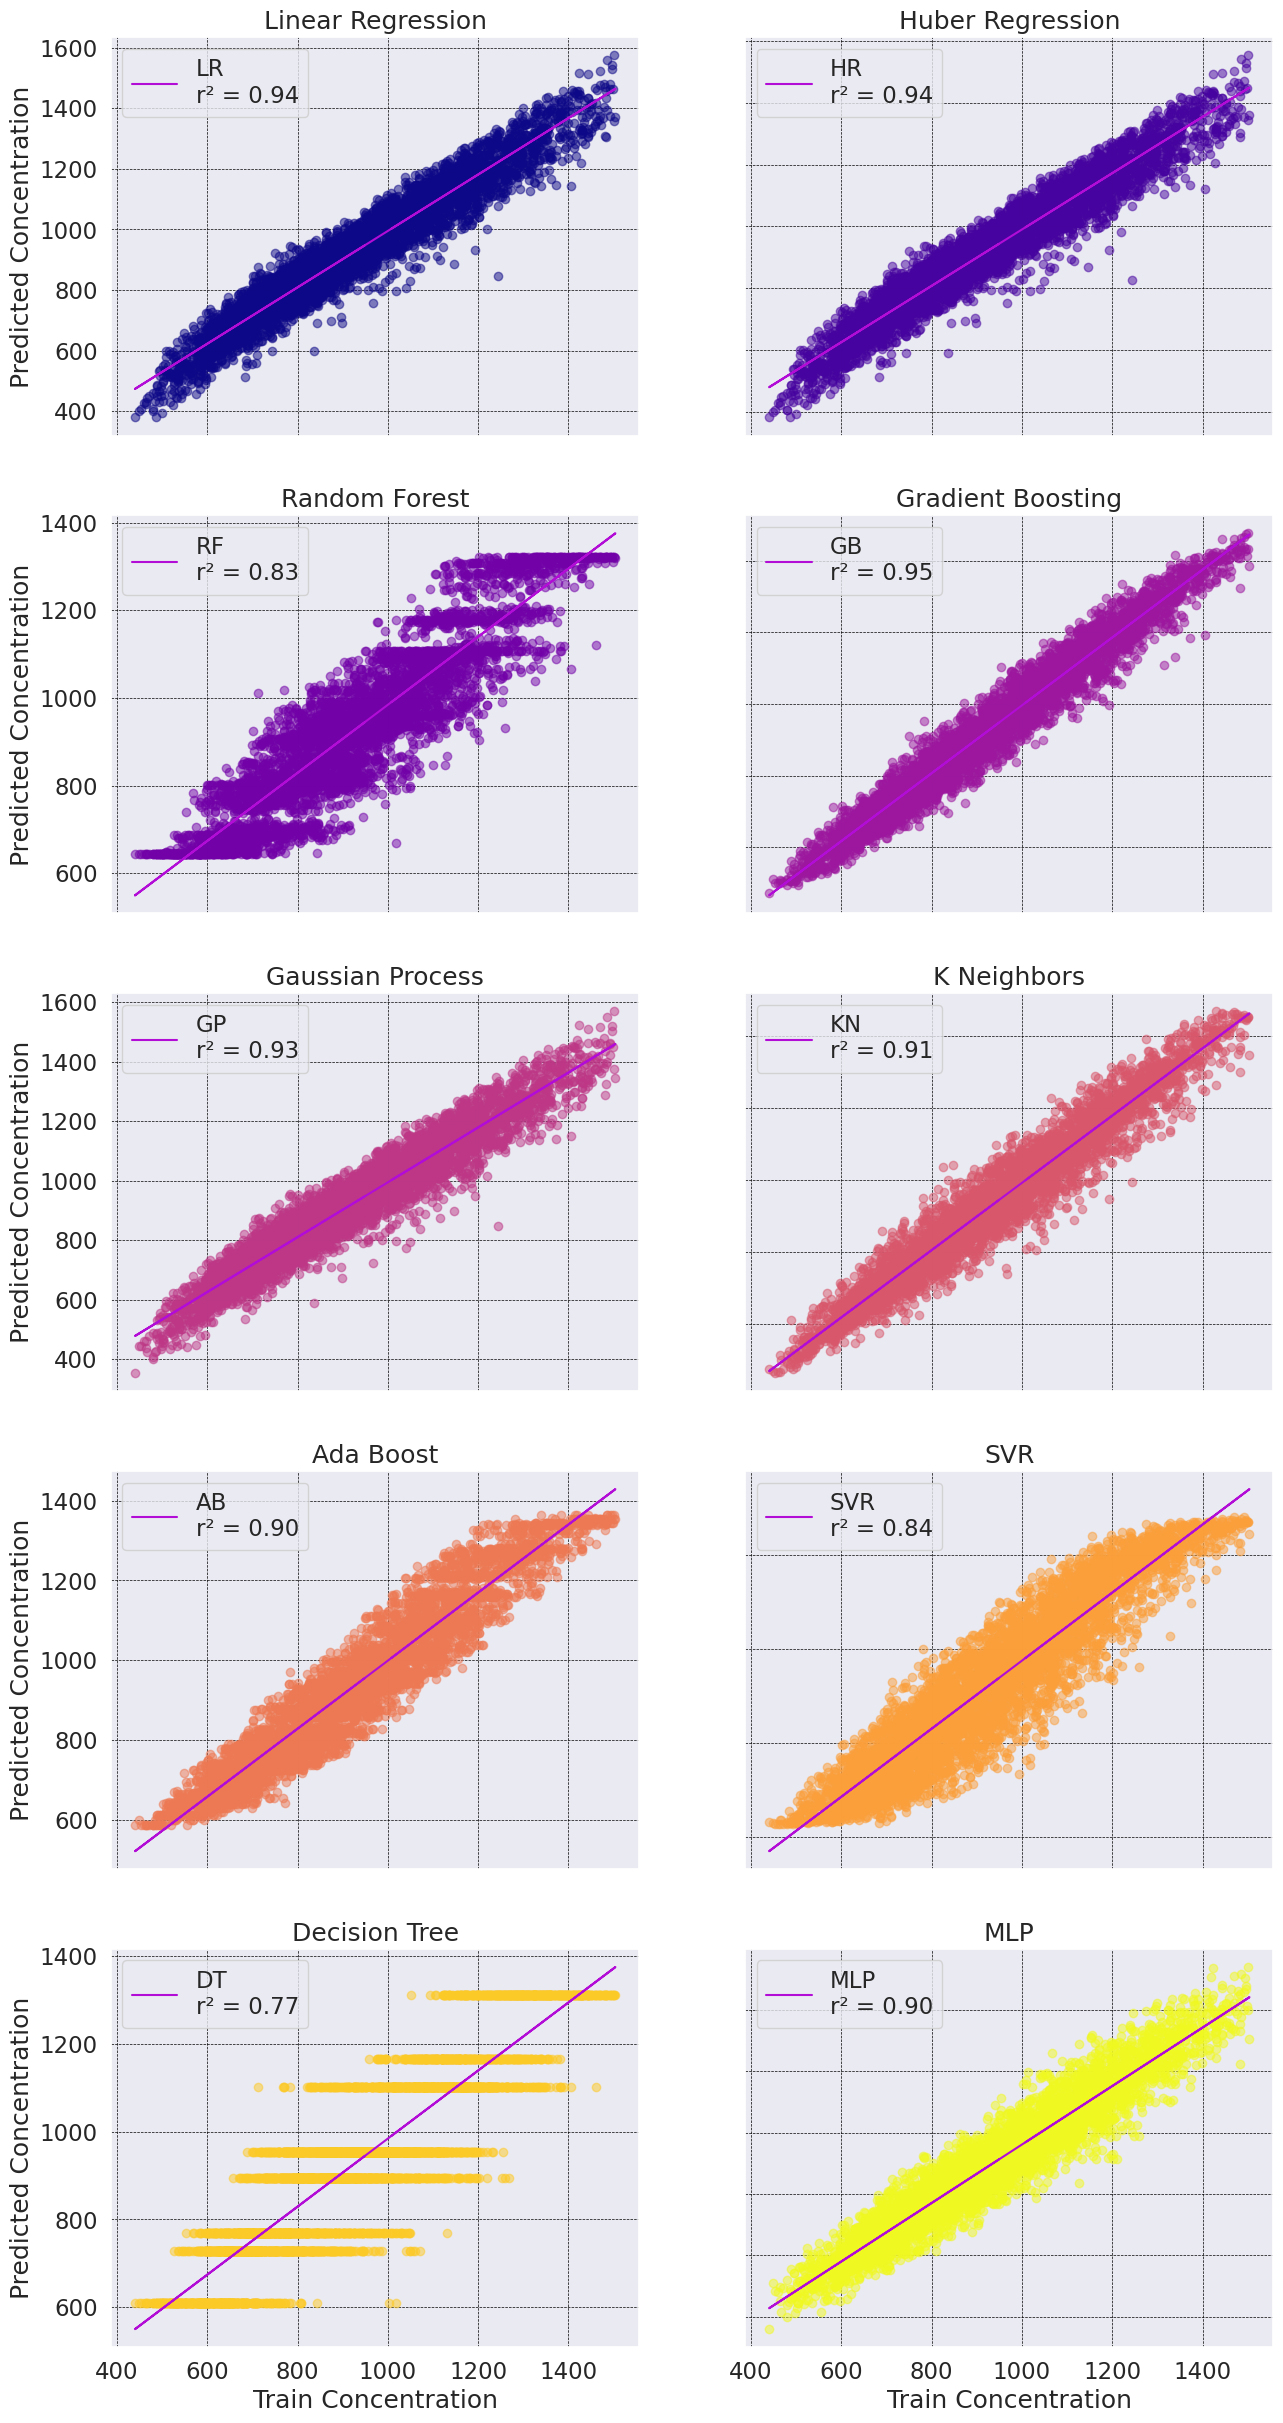

In [ ]:
plot_ML_model(1)

### Models for NOx Concentration Prediction

In [ ]:
score_df_results = pd.concat(all_model_results[2],
                        ignore_index=True).sort_values('Test R2',axis = 0, ascending = False)
score_df_results

Method  Training MSE Training R2      Test MSE   Test R2
3  Gradient Boosting   3317.762111    0.913651   4165.357804  0.896959
5        K-Neighbors   3508.565436    0.908686    5142.49282  0.872787
0  Linear Regression   6428.400155    0.832693   6401.287832  0.841648
1   Huber Regression   6547.909278    0.829583   6647.303271  0.835562
4   Gaussian Process   7501.589181    0.804762   7509.489538  0.814234
6          Ada Boost   9132.507469    0.762316   9222.962125  0.771847
2      Random Forest  10109.621542    0.736885  10922.242922  0.729811
8      Decision Tree  11730.560066    0.694699  12693.151629  0.686003
7                SVR  13048.353362    0.660401  14256.201783  0.647337
9                MLP  27870.870092    0.274628  30567.836723  0.243827

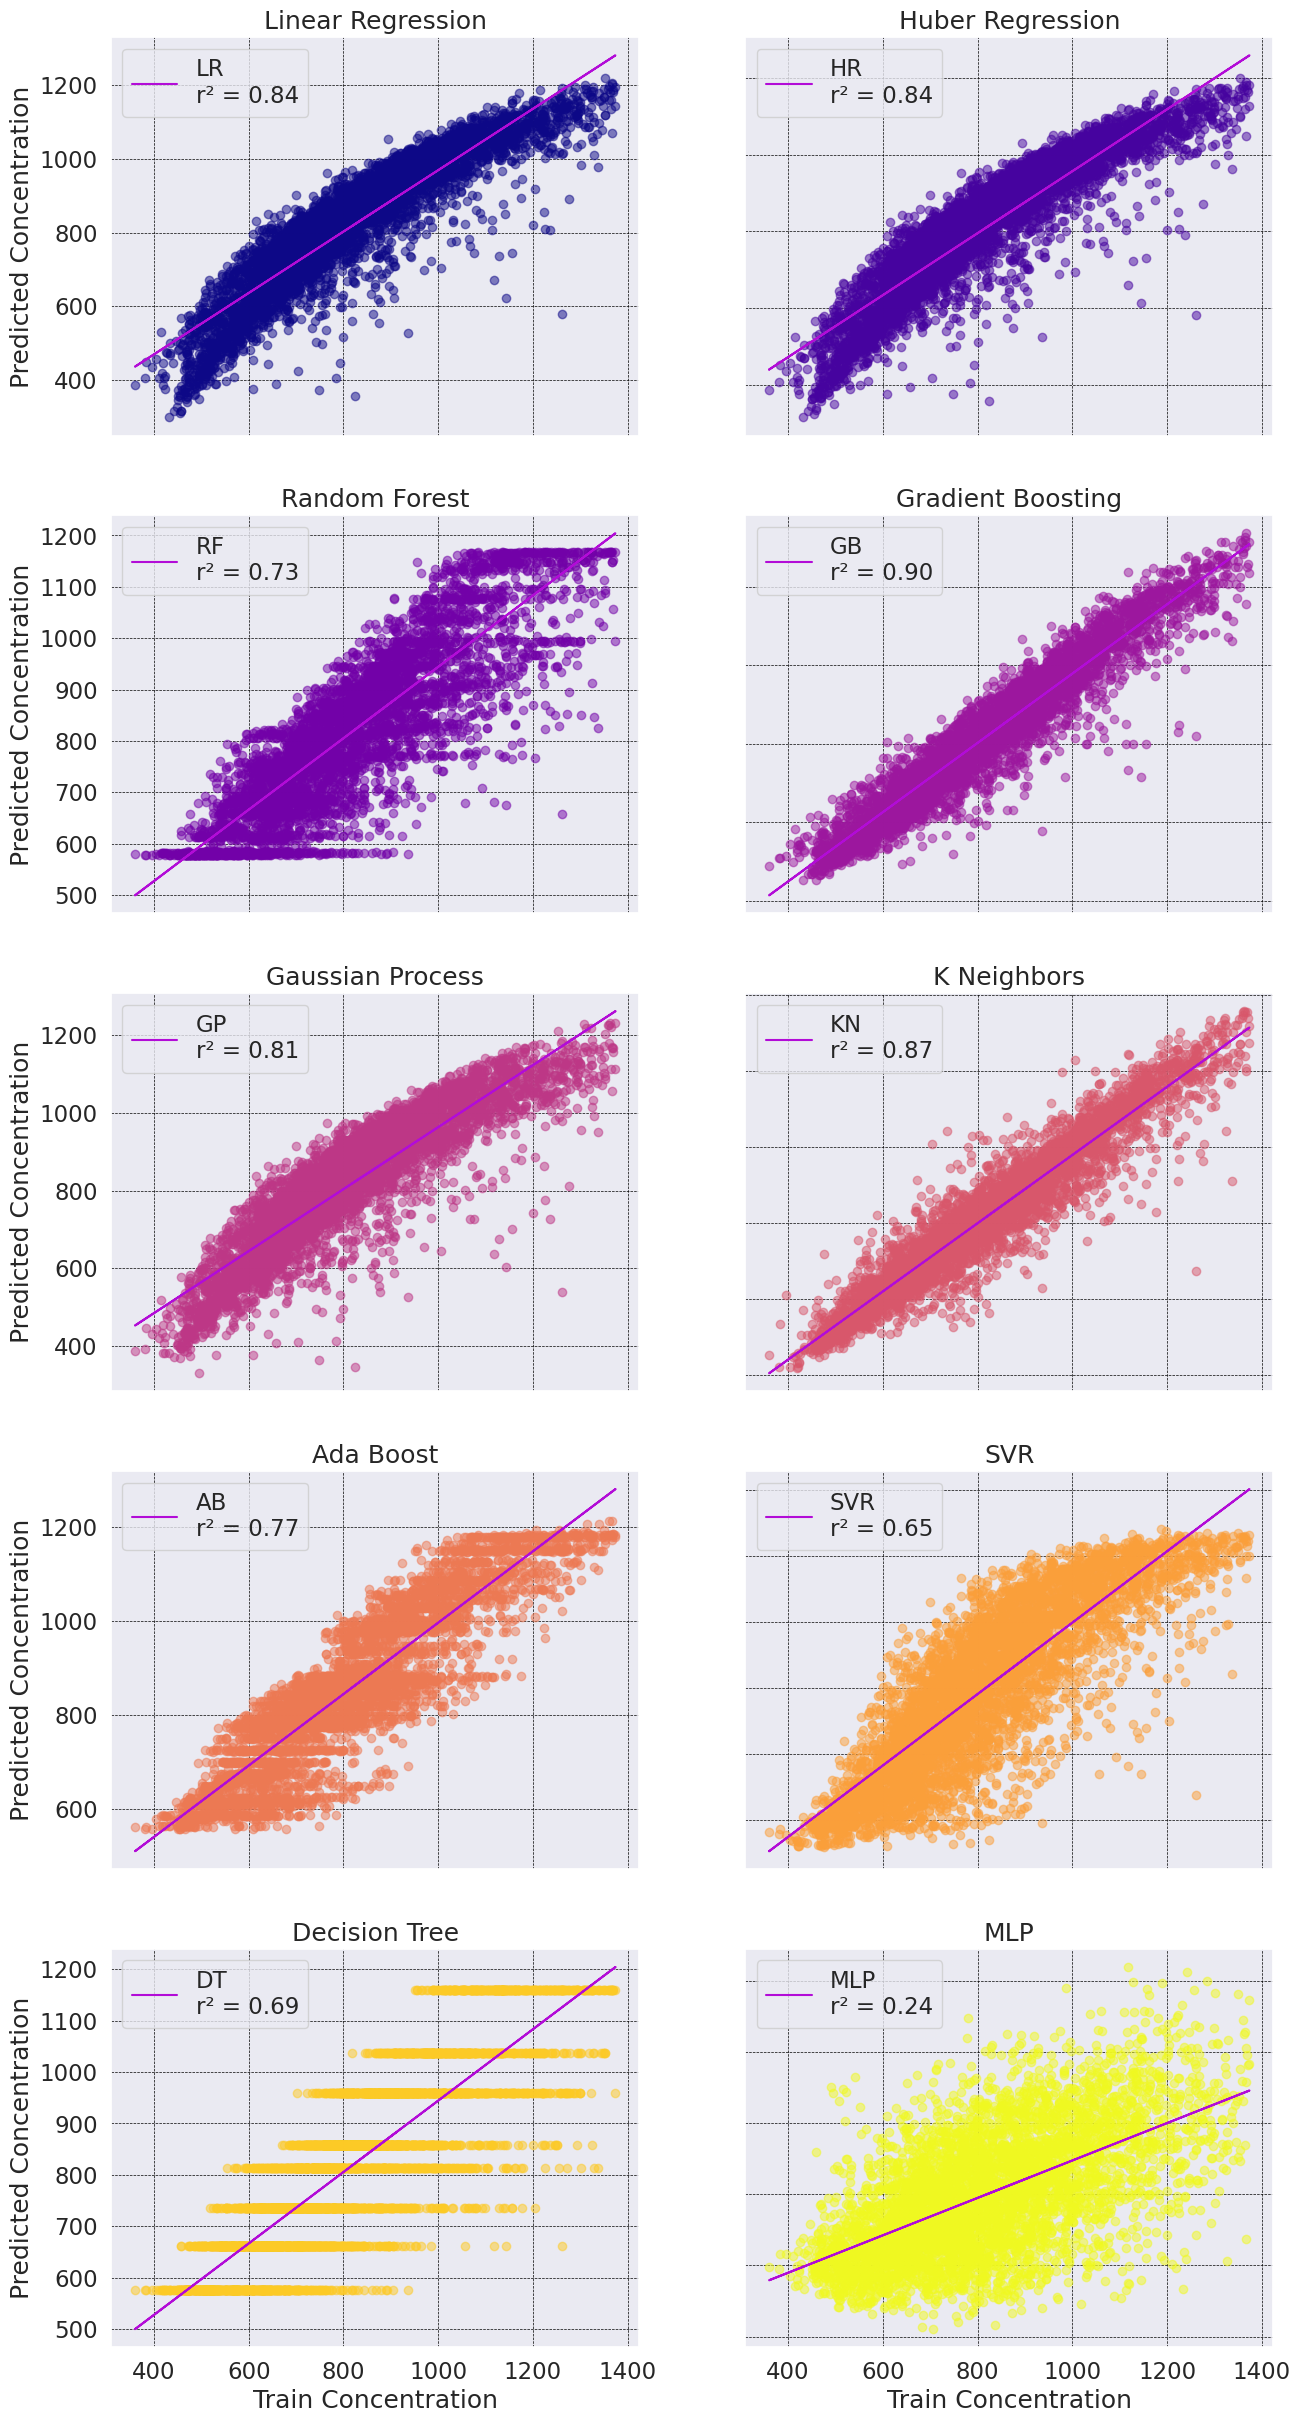

In [ ]:
plot_ML_model(2)

### Models for NO2 Concentration Prediction

In [ ]:
score_df_results = pd.concat(all_model_results[3],
                        ignore_index=True).sort_values('Test R2',axis = 0, ascending = False)
score_df_results

Method  Training MSE Training R2      Test MSE   Test R2
3  Gradient Boosting   4753.745252    0.956053   5918.001902  0.946243
0  Linear Regression   8731.627758    0.919279   8424.730564  0.923473
1   Huber Regression    8850.12314    0.918184   8607.884545   0.92181
4   Gaussian Process    10527.7825    0.902674  10183.035349  0.907502
9                MLP  10865.610564    0.899551  11644.616702  0.894225
6          Ada Boost  15545.997347    0.856282  16116.324378  0.853606
2      Random Forest  20601.422582    0.809547  21687.130834  0.803003
5        K-Neighbors  17060.185669    0.842284  25372.644361  0.769525
8      Decision Tree  24029.213399    0.777858  25401.485512  0.769264
7                SVR  69935.028265    0.353474  70564.466973  0.359022

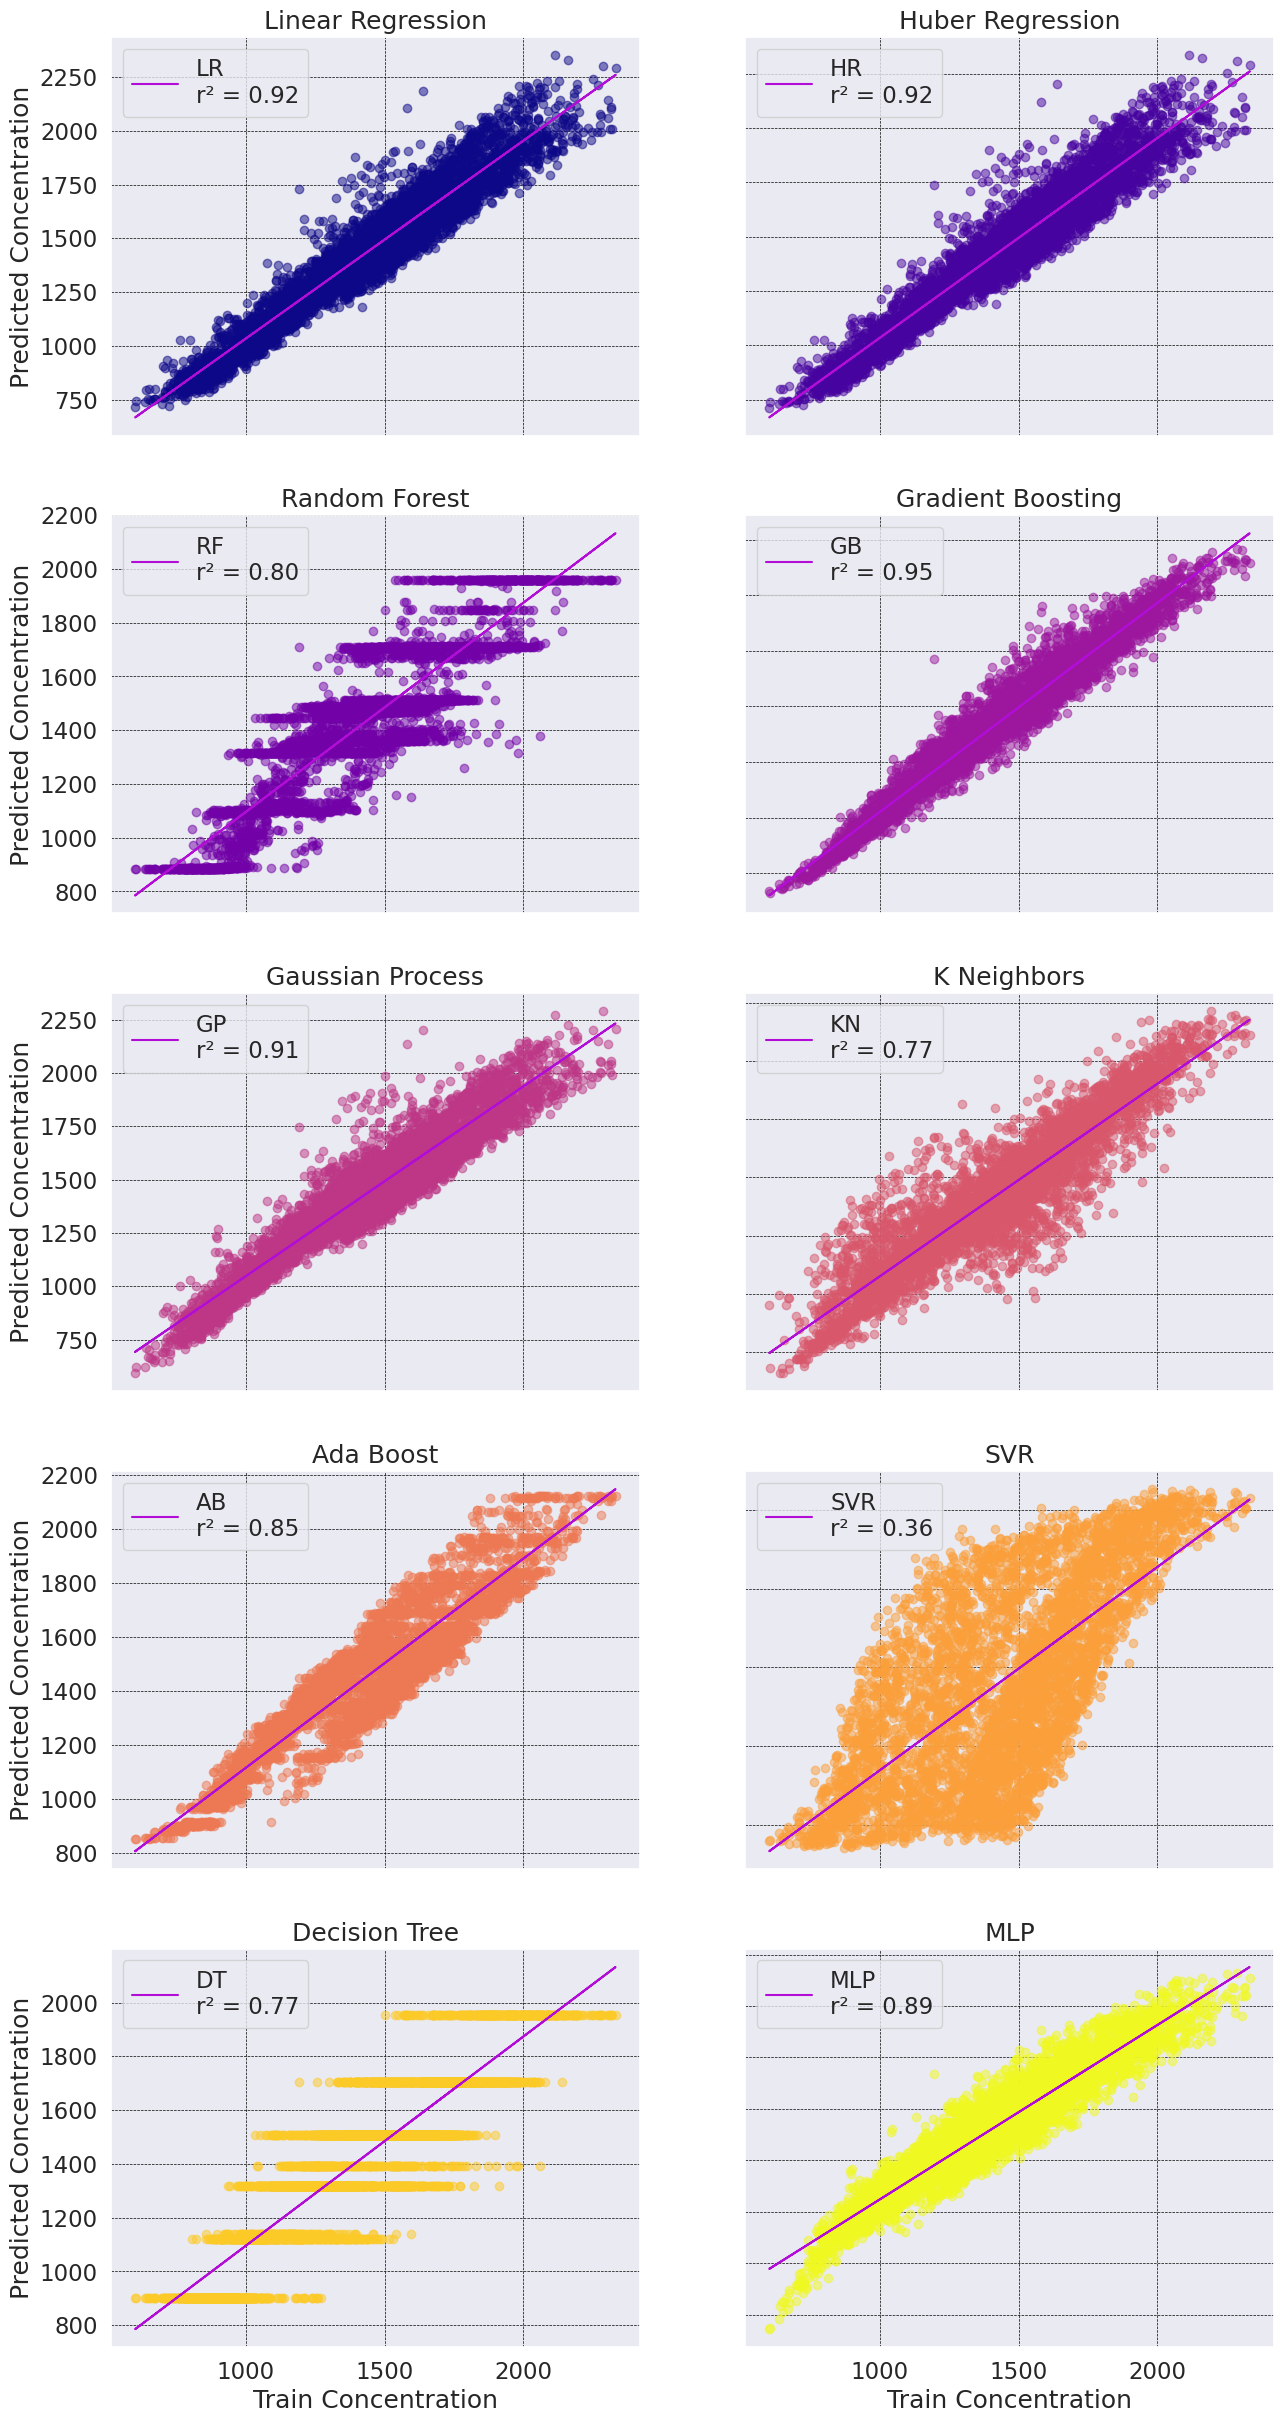

In [ ]:
plot_ML_model(3)

### Models for O3 Concentration Prediction

In [ ]:
score_df_results = pd.concat(all_model_results[4],
                        ignore_index=True).sort_values('Test R2',axis = 0, ascending = False)
score_df_results

Method  Training MSE Training R2      Test MSE   Test R2
3  Gradient Boosting   11565.43605    0.896108  15153.952621  0.868631
5        K-Neighbors   9775.791777    0.912184  16090.059115  0.860516
9                MLP  15639.546247     0.85951  16612.600745  0.855986
4   Gaussian Process  18100.090189    0.837407  19087.261412  0.834533
0  Linear Regression  18053.206166    0.837828  19088.165293  0.834525
1   Huber Regression  18347.249063    0.835187  19349.670509  0.832258
6          Ada Boost  20195.302745    0.818585  21069.514911  0.817349
2      Random Forest  23982.186167    0.784568  25338.383224  0.780342
8      Decision Tree  27077.717689    0.756761  28795.597386  0.750372
7                SVR  38680.171509    0.652536  39335.160636  0.659005

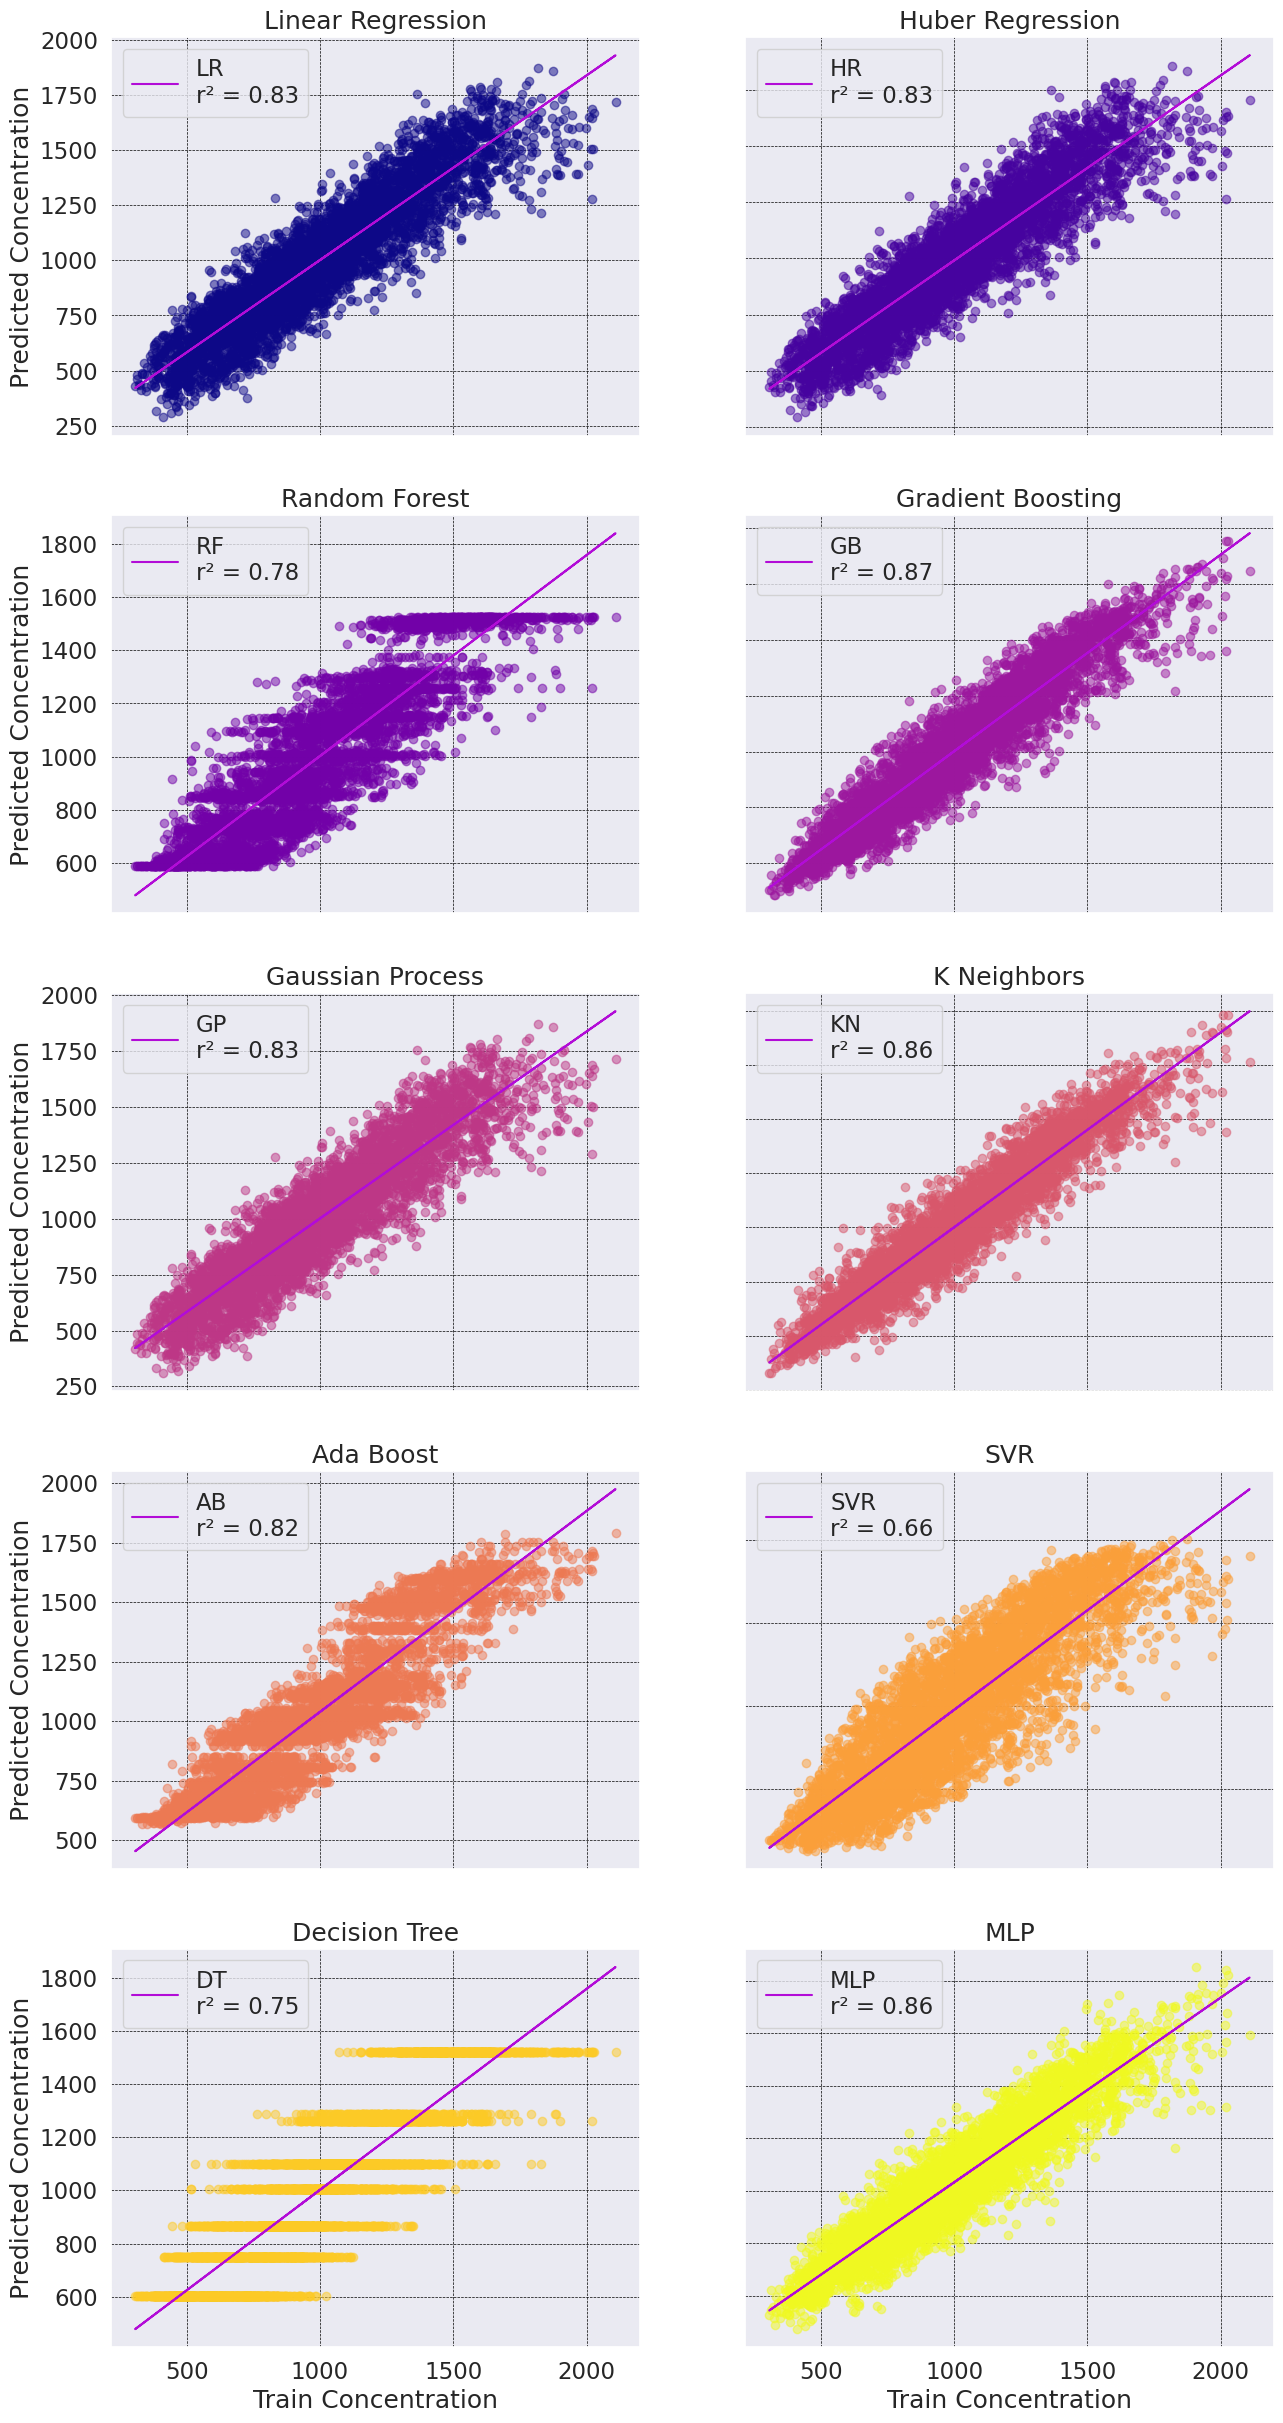

In [ ]:
plot_ML_model(4)

### Parameter Space Exploration for Gradient Boosting (GB) Model

In [ ]:
ini_params = gb.get_params()
ini_params

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### Grid search

In [ ]:
y_predict  = ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']

compound = y_predict[0]
#Designate independent and dependent variables
x  = df_final.drop([compound], axis = 1)
y  = df_final[compound]
#Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Initiate Different Regressors for ML model
gb = GradientBoostingRegressor(random_state=42)

#Setup values for parameters
grid_values = {
               'learning_rate':[0.05,0.1, 0.15],
               'n_estimators':[150, 200, 225],
               'max_depth': [5,6,7]
              }

grid_clf_acc = GridSearchCV(gb, param_grid = grid_values, scoring = 'r2', verbose=1)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_train_pred = grid_clf_acc.predict(X_train)
y_test_pred  = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('r2 Score : ' + str(r2_score(y_test,y_test_pred)))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
r2 Score : 0.9098901639476412


In [ ]:
#Make dataframe for grid search results
co_model = pd.DataFrame(['Gradient Boosting',train_mse, train_r2, test_mse, test_r2]).transpose()
co_model.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
co_model

Method Training MSE Training R2     Test MSE  Test R2
0  Gradient Boosting   650.420338    0.980188  3125.276223  0.90989

In [ ]:
# best model params
fin_params = grid_clf_acc.best_params_
fin_params

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 225}

In [ ]:
# using the values from the grid search
optimized_GB_model = GradientBoostingRegressor(**grid_clf_acc.best_params_)

In [ ]:
# save model into pickle file
with open('air_quality.pkl','wb') as f:
    pickle.dump(optimized_GB_model,f)

# load model from pickle file
with open('air_quality.pkl', 'rb') as f:
    gb_model = pickle.load(f)

### Using optimized GB Model to Predict CO Concentration

In [ ]:
optimized_GB_model.fit(X_train, y_train)
co_gb_predictions = optimized_GB_model.predict(X_test)
print('Regression Model: R²={:.2f}'.format(r2_score(y_test, co_gb_predictions)))

Regression Model: R²=0.91


#### evaluating the model fitness

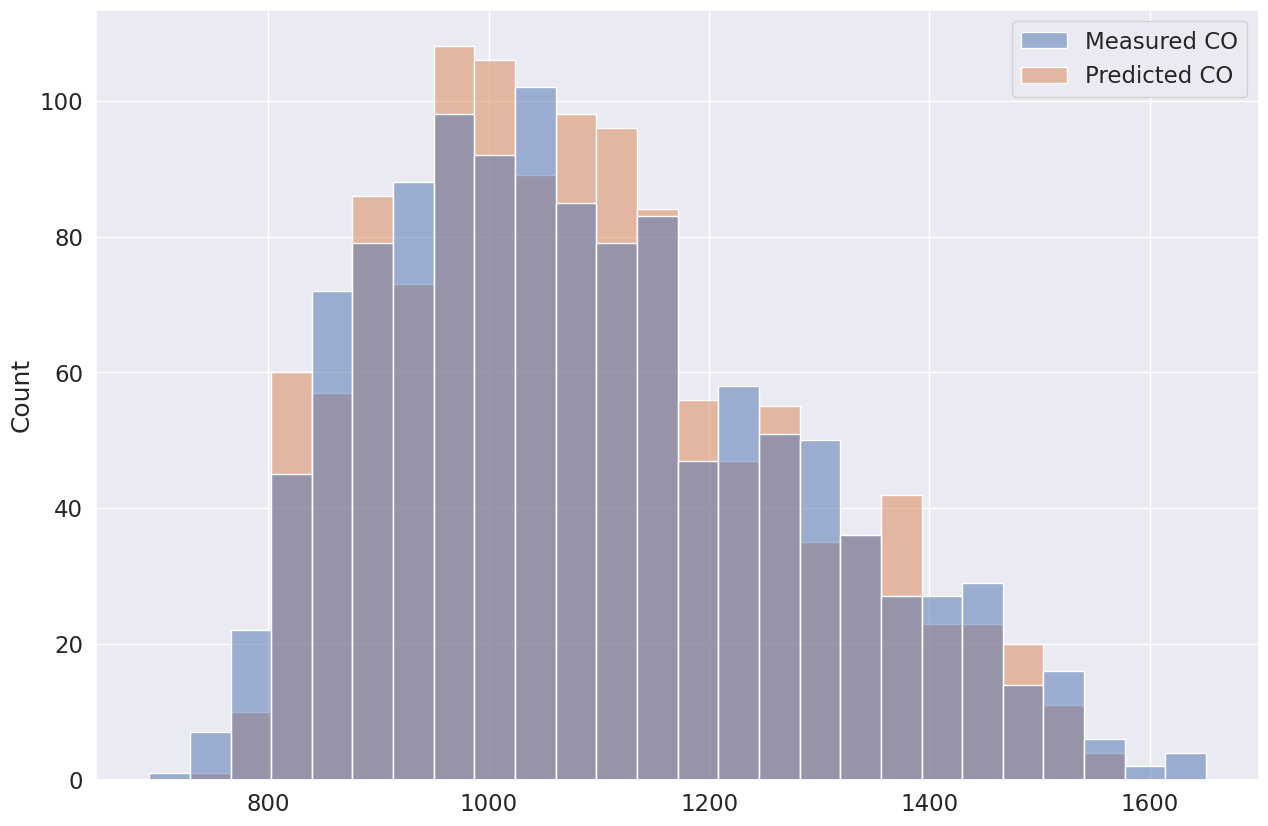

In [ ]:
final = pd.DataFrame()
final['Measured CO']   = y_test
final['Predicted CO']  = co_gb_predictions

plt.figure(figsize=(15,10))
sns.histplot(data=final)
plt.show()

#### Histogram of residuals

the model is performing well if the errors are distributed normally

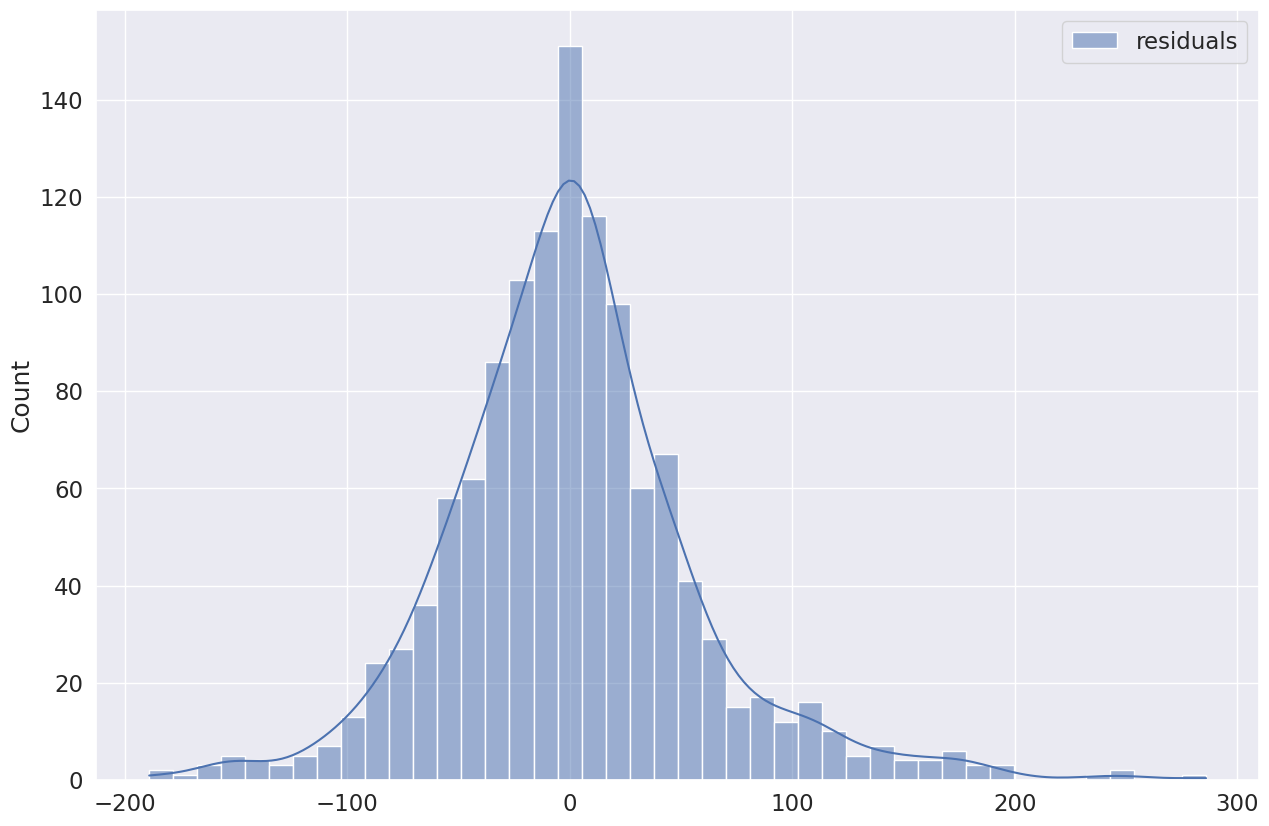

In [ ]:
plt.figure(figsize=(15,10))
res = pd.DataFrame()
res['residuals'] = final['Measured CO'] - final['Predicted CO']
sns.histplot(data=res, kde = True)
plt.show()

#### Check for heteroskedasticity

1. **Definition**: Heteroskedasticity occurs when the variance of the errors in a model is not constant across all levels of the independent variable(s), potentially leading to inefficient and biased estimates.
2. **Indicators to Look For**: Check for patterns in the residuals vs. fitted values plot (a "funnel" shape suggests heteroskedasticity) or use statistical tests like the Breusch-Pagan or White's test to detect non-constant variance.


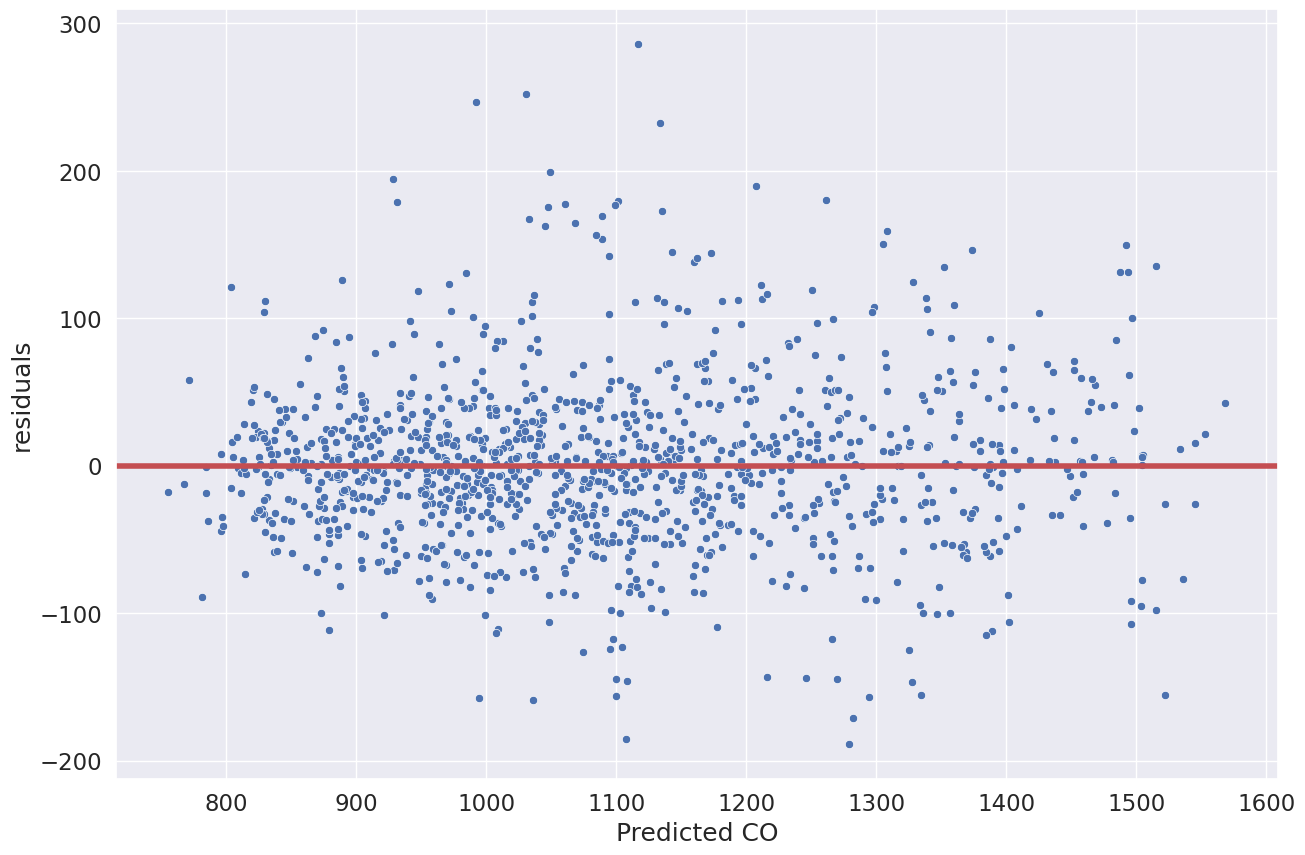

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x= final['Predicted CO'], y=res['residuals'])
plt.axhline(y=0.0, color='r', linestyle='-', linewidth=4)
plt.show()

#### normality Q-Q plot

- This plot is used to determine the normal distribution of errors.
- If the data is perfectly normally distributed, then all the points will be contained in a straight line.
- Deviations from this behavior suggest non-linearity is present.

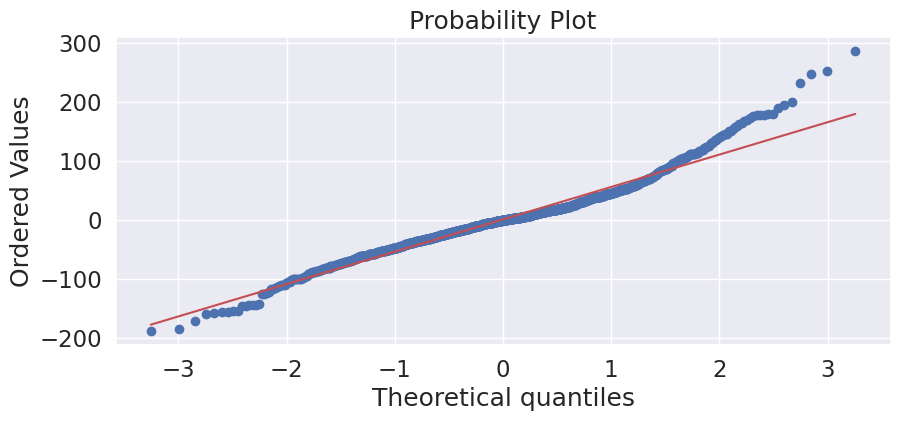

In [ ]:
fig = plt.figure(figsize = (10,4))
stats.probplot(res['residuals'], dist="norm", plot=plt)
plt.show()

### test the optimized model on entire dataset

In [ ]:
y_predict  = ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']

compound = y_predict[0]

#Designate independent and dependent variables
x  = df_final.drop([compound], axis = 1)
y  = df_final[compound]

#Predict concentration over entire dataset
optimized_GB_model.fit(x, y)
co_gb_pred_full = optimized_GB_model.predict(x)
print('Gradient descent Model: R²={:.2f}'.format(r2_score(y, co_gb_pred_full)))

Gradient descent Model: R²=0.98


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
import math

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, co_gb_pred_full)
print('Mean Absolute Error (MAE):', mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, co_gb_pred_full)
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Calculate Mean Absolute Percentage Error(MAPE)
msle =mean_absolute_percentage_error(y, co_gb_pred_full)
print('Mean Absolute Percentage Error(MAPE):', msle)

Mean Absolute Error (MAE): 20.762815452290685
Mean Squared Error (MSE): 800.4954288191599
Root Mean Squared Error (RMSE): 28.29302791889125
Mean Absolute Percentage Error(MAPE): 0.019309570256261906


the model performs better, showing that other concentrations are correlated with other concentrations

#### predicted CO concentrations vs actual values

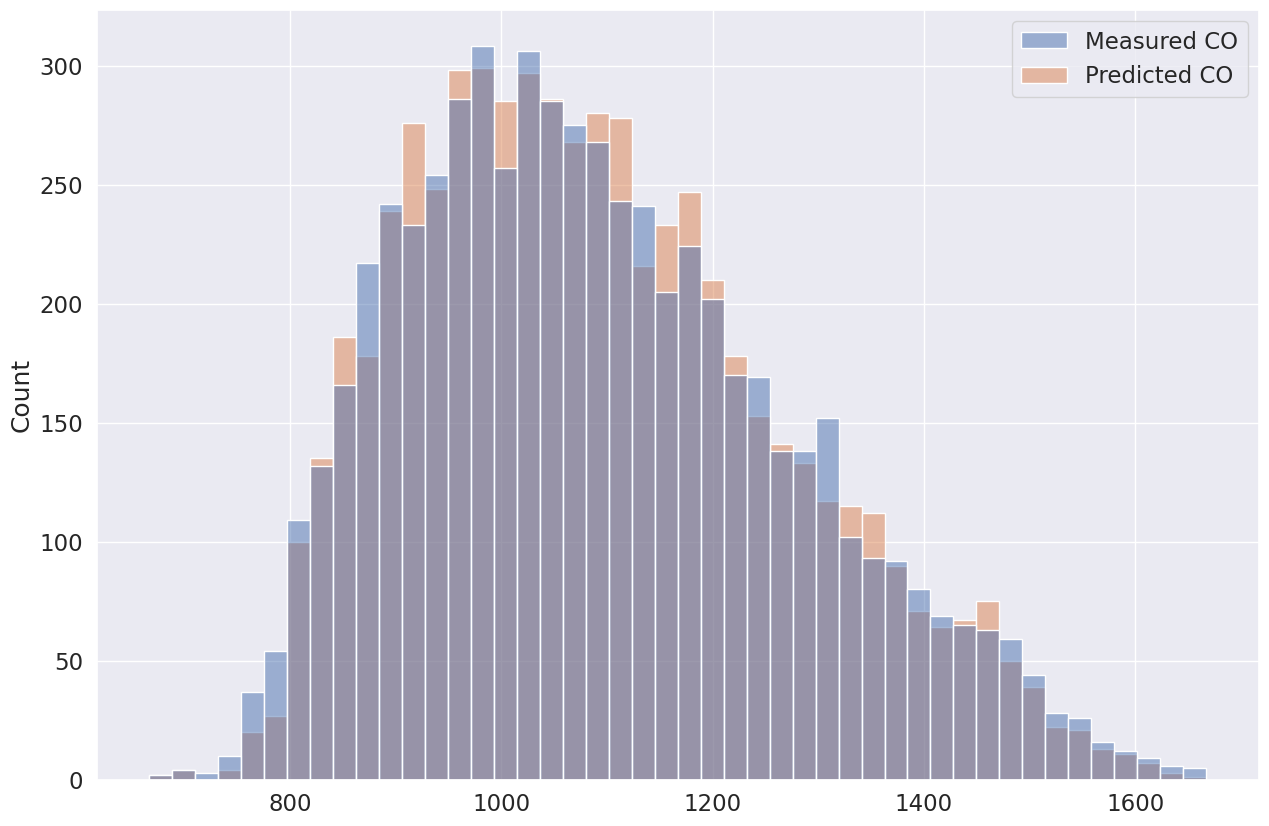

In [ ]:
full_final = pd.DataFrame()
full_final['Measured CO']  = y
full_final['Predicted CO'] = co_gb_pred_full

plt.figure(figsize=(15,10))
sns.histplot(data=full_final)
plt.show()

#### Histogram of residuals

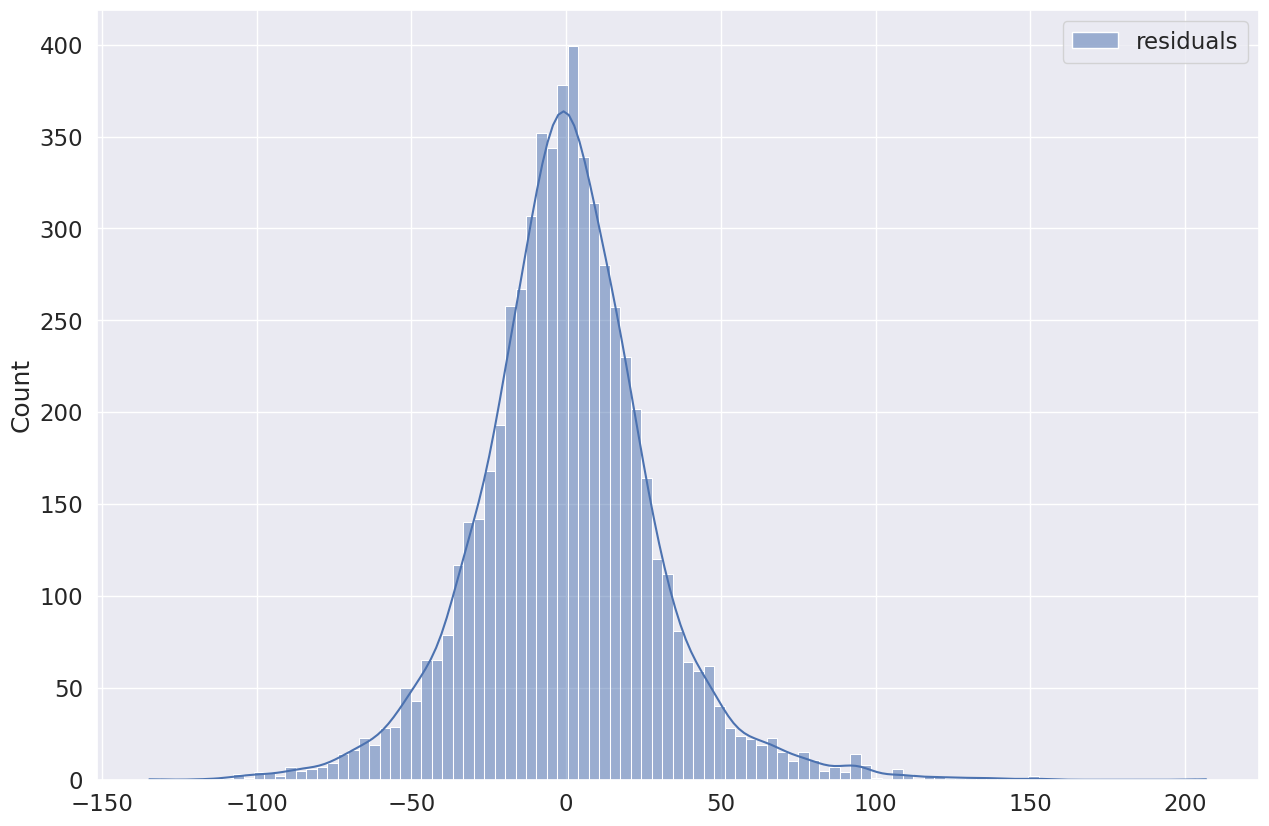

In [ ]:
plt.figure(figsize=(15,10))
res_final = pd.DataFrame()
res_final['residuals'] = full_final['Measured CO'] - full_final['Predicted CO']
sns.histplot(data=res_final, kde = True)
plt.show()

#### Check for heteroskedasticity

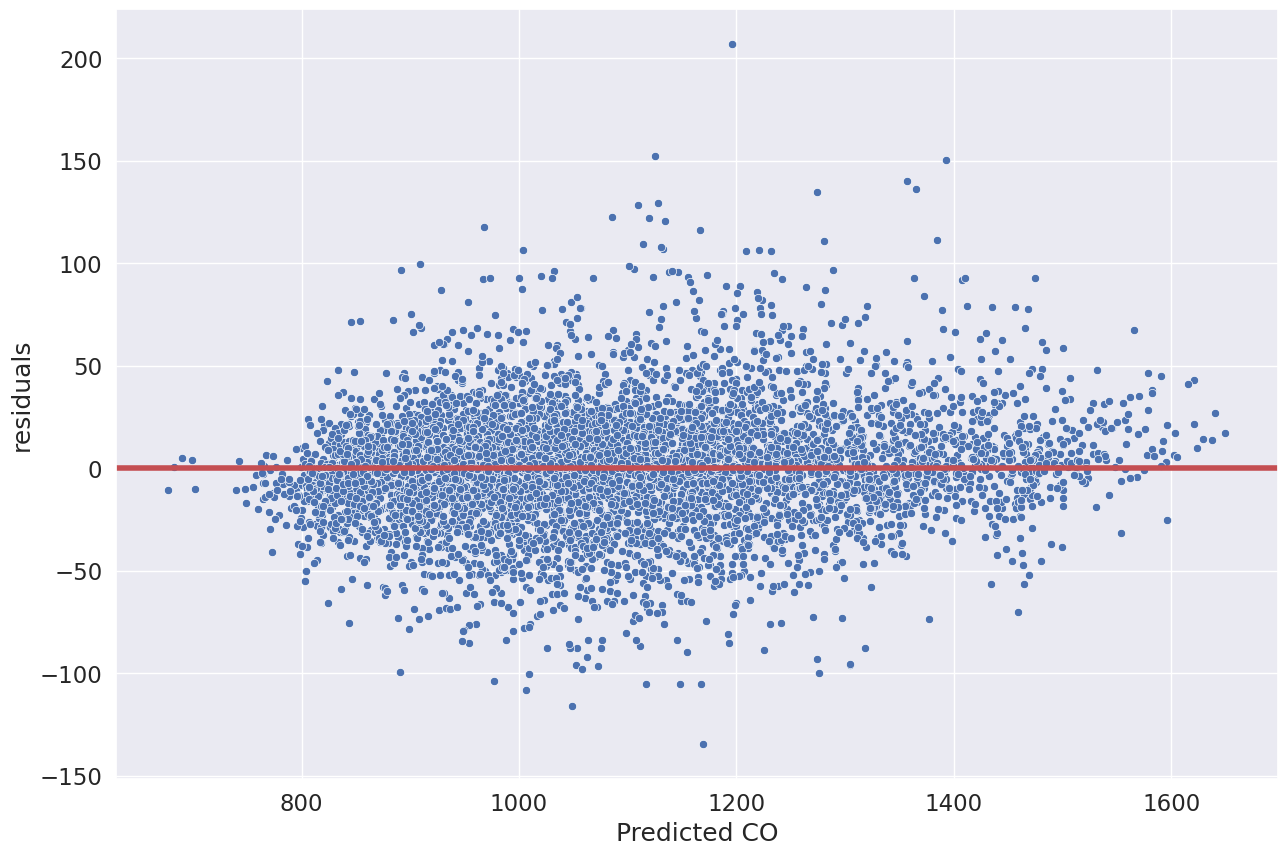

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x= full_final['Predicted CO'], y=res_final['residuals'])
plt.axhline(y=0.0, color='r', linestyle='-', linewidth=4)
plt.show()

#### normality Q-Q plot


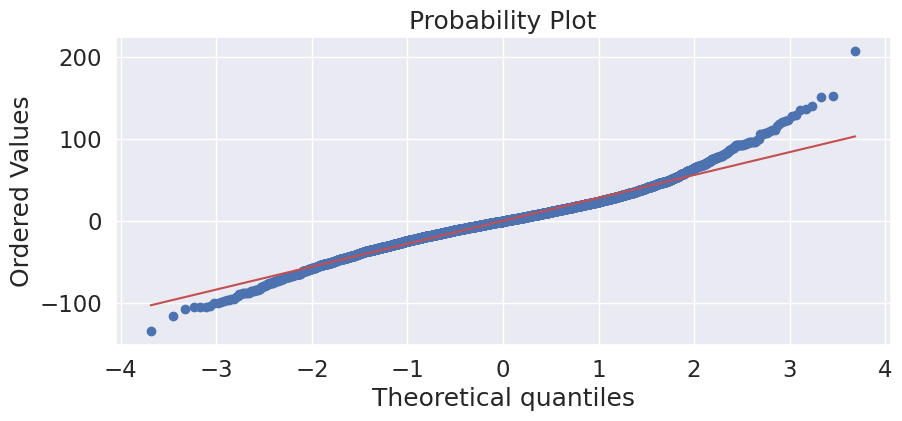

In [ ]:
fig = plt.figure(figsize = (10,4))
stats.probplot(res_final['residuals'], dist="norm", plot=plt)
plt.show()

tells that maybe we couldve done better outlier removal

### observed vs predicted CO concentrations over the course of 1 year

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

plt.figure(figsize=(30,20))
maxRow = 5250
sns.scatterplot(x = aq_filtered['DateTime'][:maxRow], y = full_final['Predicted CO'][:maxRow],
             hue = aq_filtered['Month'], palette = 'twilight_shifted', legend = False,
             s=300)
sns.lineplot(x = aq_filtered['DateTime'][:maxRow], y = full_final['Measured CO'][:maxRow],
             hue = aq_filtered['Month'] , palette = 'twilight_shifted',
             legend = 'auto')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0 ,fontsize = 30)
plt.title('Observed vs Predicted CO concentrations', fontsize = 50)
plt.ylabel('CO Concentration', fontsize = 50)
plt.xlabel('Time[yy/mm]', fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

NameError: name 'aq_filtered' is not defined

<Figure size 3000x2000 with 0 Axes>

## Conclusion

- random forest performed the best among all the other algorithms
- used grid search for hyperparameter tuning
- various plots like predicted vs actual, histogram of residuals, Check for heteroskedasticity and Q-Q plot was used.

